In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy as sci
from sklearn.linear_model import LinearRegression
from os import listdir
import pandas as pd
import os
import glob

In [2]:
# rename dat files and save in /n and /s
n_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_n' in i]
s_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_s' in i]
name = [f'dla_mode_n_ts_{10**(int(i/26))}_nb_10000_seed_{i}_.dat' for i in range(5,105,5)]
name_ = [f'dla_n_mode_{10**(int(i/26))}_{int(i/5%5)}.dat' for i in range(5,105,5)]

os.rename('./files/'+name[-1],'./files/n/'+name_[-1])

['dla_mode_n_ts_1_nb_10000_seed_5_.dat', 'dla_mode_n_ts_1_nb_10000_seed_10_.dat', 'dla_mode_n_ts_1_nb_10000_seed_15_.dat', 'dla_mode_n_ts_1_nb_10000_seed_20_.dat', 'dla_mode_n_ts_1_nb_10000_seed_25_.dat', 'dla_mode_n_ts_10_nb_10000_seed_30_.dat', 'dla_mode_n_ts_10_nb_10000_seed_35_.dat', 'dla_mode_n_ts_10_nb_10000_seed_40_.dat', 'dla_mode_n_ts_10_nb_10000_seed_45_.dat', 'dla_mode_n_ts_10_nb_10000_seed_50_.dat', 'dla_mode_n_ts_100_nb_10000_seed_55_.dat', 'dla_mode_n_ts_100_nb_10000_seed_60_.dat', 'dla_mode_n_ts_100_nb_10000_seed_65_.dat', 'dla_mode_n_ts_100_nb_10000_seed_70_.dat', 'dla_mode_n_ts_100_nb_10000_seed_75_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_80_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_85_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_90_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_95_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_100_.dat']
['dla_n_mode_1_1.dat', 'dla_n_mode_1_2.dat', 'dla_n_mode_1_3.dat', 'dla_n_mode_1_4.dat', 'dla_n_mode_1_0.dat', 'dla_n_mode_10_1.dat', 'dla_n_mode_10_

FileNotFoundError: [Errno 2] No such file or directory: './files/dla_mode_n_ts_1000_nb_10000_seed_100_.dat' -> './files/n/dla_n_mode_1000_0.dat'

In [9]:
## save files in /particles
def extend_fibers(fname):    
    print('extending ', fname)
    fout = fname.replace('dla_','')
    #fout = fname.replace('/files','./files/particles')
    with open ('./files/particles/%s'%fout, "w") as fid:
        with open('./files/%s'%fname, 'r') as fid2:
            for row in fid2:
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])
                    for i in range(0,18):
                        #print('ok')
                        fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))

def mass_center(fname):
    y, yt2, counts1 = [], [], []

    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y.append(int(row[3]))
    yc, counts = np.unique(y, return_counts=True)    
    #print(yc)
    #print(counts)
    fiber_length = np.max(yc) - np.min(yc)
    # y of mass center
    yc0 = sorted(zip(yc, counts), key=lambda u: u[1], reverse=True)
    #print(yc0)
    #print(yc0[0][0])
    for i in range(len(yc0)):
        yt2.append(yc0[i][0])
        counts1.append(yc0[i][1])

    #print('length: %d' %fiber_length)

    return yc0, yt2, counts1, yc0[0][0], fiber_length

def transversal_section(fname, yc0, yc, arquivo):
   
    x, z = [], []
    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y = int(row[3])
            
            if y == yc0:
                #print('entrou')
                #print(int(row[2]))
                x.append(int(row[2]))
                z.append(int(row[4]))

    xc, zc = np.mean(x), np.mean(z)
    #print(x)
    #print(z)
    #x = np.array(x)
    #z = np.array(z)
    #print(x)
    #print(z)
    x2 = np.power(x-xc,2)
    z2 = np.power(z-zc,2)
    radius = np.max(np.sqrt(x2+z2))
    #radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
    #radius = np.max(radius)
    #print(radius)
    #plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
    #plt.show()
    occup = float(len(x))
    A = float(np.pi*(radius**2))
    densitty = float(occup/A * 100)
    #print("massa: %f" % occup)
    #print("Area: %f" %A)
    #print("Densidade %.2f" % densitty)

    theta = np.linspace(0,2*np.pi,2000)
    x_ = xc+radius*np.cos(theta)
    y_ = zc+radius*np.sin(theta)

    plt.figure(figsize=(10,10))
    #plt.grid()
    plt.plot([xc],[zc],'s',color = 'firebrick', markersize = 12,zorder = 5,label = 'Centro') # Centro
    plt.plot(x,z,'s',color='darkslategray', markersize = 12,zorder = 1,label = 'Dados') # Dados
    #plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
    plt.axis('off')
    plt.xlim(-35,35)
    plt.ylim(-35,35)
    plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
    
    return x, z, xc, zc, radius, densitty

def fractal(Radius,x,z,xcent,zcent,contador,arquivo):
    ## frac dimension 
    n = 100
    radius = np.linspace(5,Radius,n)
    cont = np.zeros(n)
    for j in range(0,len(radius)):
        c = 0
        for i in range(0,len(x)):
            ri = m.sqrt(((x[i]-xcent) **2) + ((z[i]-zcent)**2))
            if ri <= radius[j]:
                c += 1
                cont[j] = c
    #radius = 0
    #occup = float(len(x))
    #A = float(np.pi*(Radius**2))
    #densitty = float(occup/A * 100)
    #print("massa: %f" % occup)
    #print("Area: %f" %A)
    #print("Densidade %.2f" % densitty)
    #print(radius)
    vmin = np.log(radius[0])
    vmax = np.log(radius[-1])
    radius = np.log(radius).reshape(-1,1)
    cont = np.log(cont/(contador + 1)).reshape(-1,1)
    j, R = 0, 0
    #print(radius)
    #print(cont)
    for i in range(10,len(radius)):
        reg = LinearRegression().fit(radius[:i], cont[:i])
        r2 = reg.score(radius[:i], cont[:i])
        if(r2 > R):     
            R = r2
            j = i
        #Y = reg.coef_*v[:i] + reg.intercept_
    reg = LinearRegression().fit(radius[:j], cont[:j])
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
    plt.figure(figsize = (10,10))
    plt.plot(radius, cont, 'o--',color='darkslategray')
    plt.xlabel('log R (lattices units)')
    plt.ylabel('log m (ocuppied lattices units)')
    plt.plot(np.array([vmin,vmax]), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
    plt.legend()
    plt.savefig("./img/"+arquivo[18:-4]+"_fractal" + '.jpg', dpi=400)
    #plt.show()


    return reg.coef_[0][0]

def mass_per_length(yt,counts,max, num, arquivo):
    plt.figure(figsize = (10,10))
    fontlabel = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'style': 'italic',
        'size': 22,
        }
    yleft = []
    yright = []
    xleft = []
    xright = []
    #print(yt)

    idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


    for j in idx:

        #print(type(int(j)))
        plt.plot(yt[int(j)] - np.min(yt), counts[int(j)], color = 'darkslategray', linewidth = 4,markersize=12, marker = 'd', zorder = 1)
        #print(yt[j] - min(yt))
        #print(counts[j])

        if yt[j] > max:
            yright.append(counts[j])
            xright.append(yt[j] - np.min(yt))

        else:
            yleft.append(counts[j])
            xleft.append(yt[j] - np.min(yt))
        

    #plt.xlim(0,2200)
    #plt.ylim(0,210)

    ## Lado esquerdo 
    yleft=np.array(yleft)
    xleft=np.array(xleft)
    xleft = xleft.reshape(-1,1)
    yleft = yleft.reshape(-1,1)


    ## Lado direito
    yright=np.array(yright)
    xright=np.array(xright)
    xright = xright.reshape(-1,1)
    yright = yright.reshape(-1,1)


    reg = LinearRegression().fit(xleft, yleft)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
    Y = Y[0]
    plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y,color = 'firebrick', linewidth = 4, zorder = 5)

    reg = LinearRegression().fit(xright, yright)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
    Yy = Yy[0]
    plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy,color = 'firebrick', linewidth = 4,zorder = 5)
    plt.xlabel('Distância para a ponta(unidades da rede)',fontdict=fontlabel)
    plt.ylabel("Massa(unidades da rede ocupada)",fontdict=fontlabel)
    plt.xticks(size = 20, family = 'serif', weight = 'normal')
    plt.yticks(size = 20, family = 'serif', weight = 'normal')
    plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )
    plt.savefig("./img/"+arquivo[18:-4]+"_tips" + '.jpg', dpi=400)
    plt.show()

In [5]:
### EXTEND FIBERS

#wdir = './files/particles'
#print(os.listdir('./files/'))
#for fname in os.listdir(wdir):
#extend_fibers(os.path.join(wdir, fname))
files = ['mode_n_ts_1_nb_10000_seed_', 'mode_n_ts_10_nb_10000_seed_', 'mode_n_ts_100_nb_10000_seed_', 'mode_n_ts_1000_nb_10000_seed_', 'mode_n_ts_10000_nb_10000_seed_',
'mode_s_ts_1_nb_10000_seed_', 'mode_s_ts_10_nb_10000_seed_', 'mode_s_ts_100_nb_10000_seed_', 'mode_s_ts_1000_nb_10000_seed_', 'mode_s_ts_10000_nb_10000_seed_', ]
#print(files[0])
for j in files[:]:
    for i in os.listdir('./files/'):
        i.split()
        #print(i[3:-7])
        if i[4:-7] == j:
            print(i)
            extend_fibers(i)


dla_mode_n_ts_1_nb_10000_seed_15_.dat
extending  dla_mode_n_ts_1_nb_10000_seed_15_.dat
dla_mode_n_ts_1_nb_10000_seed_12_.dat
extending  dla_mode_n_ts_1_nb_10000_seed_12_.dat


IndexError: list index out of range

./files/particles/mode_n_ts_1_nb_10000_seed_14_.dat


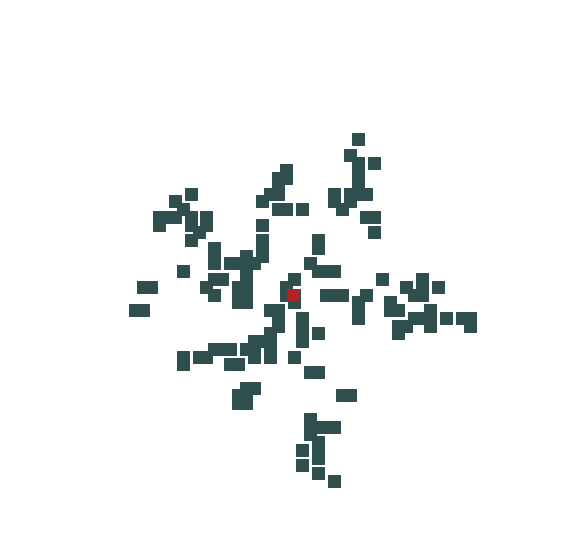

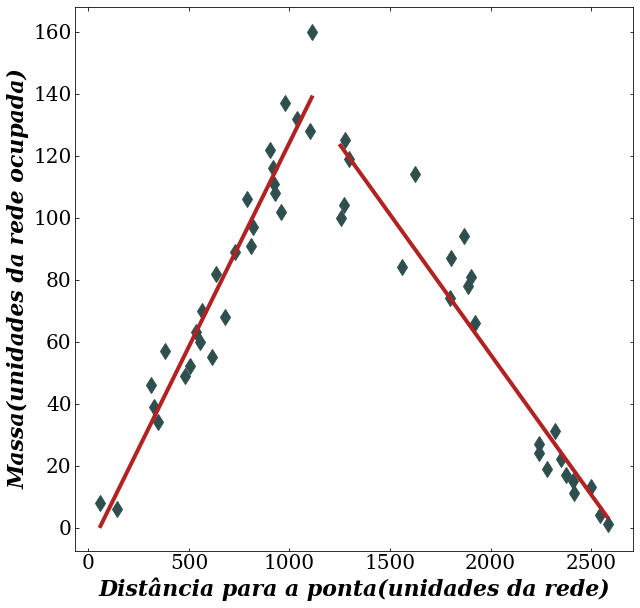

./files/particles/mode_n_ts_1_nb_10000_seed_15_.dat


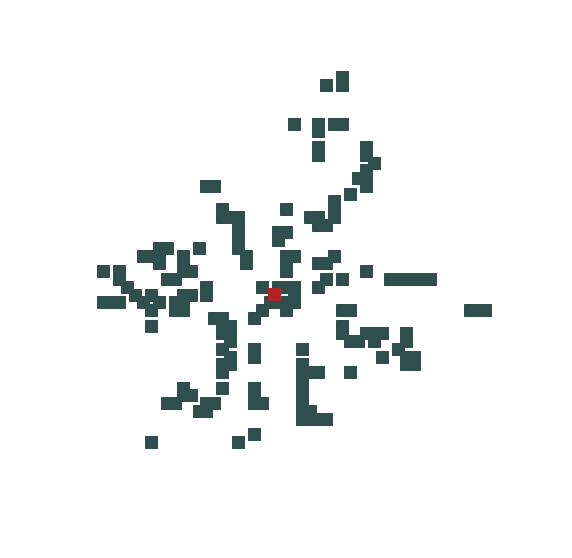

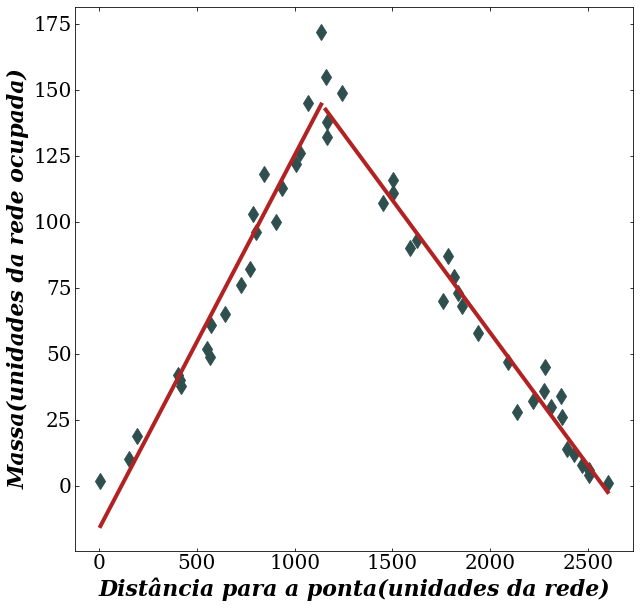

./files/particles/mode_n_ts_1_nb_10000_seed_11_.dat


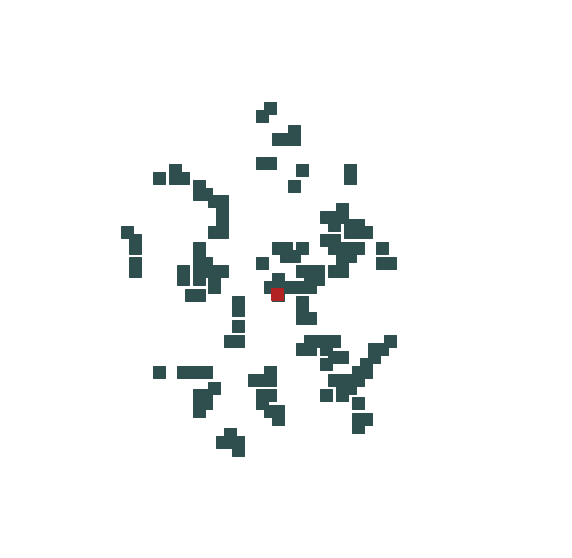

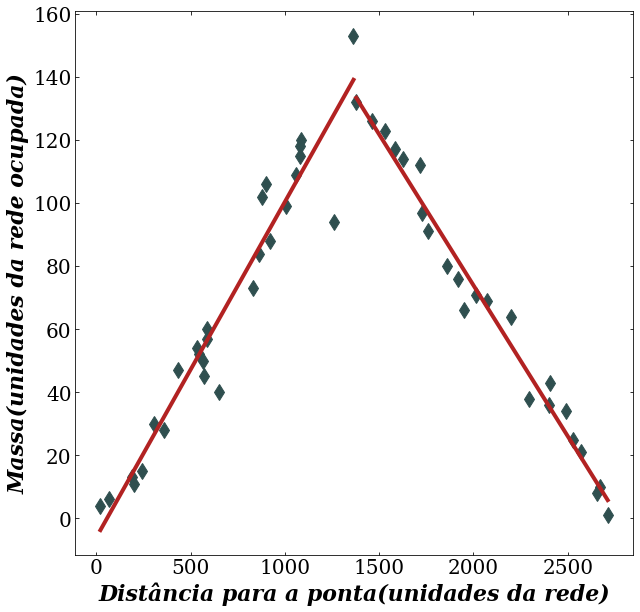

./files/particles/mode_n_ts_1_nb_10000_seed_10_.dat


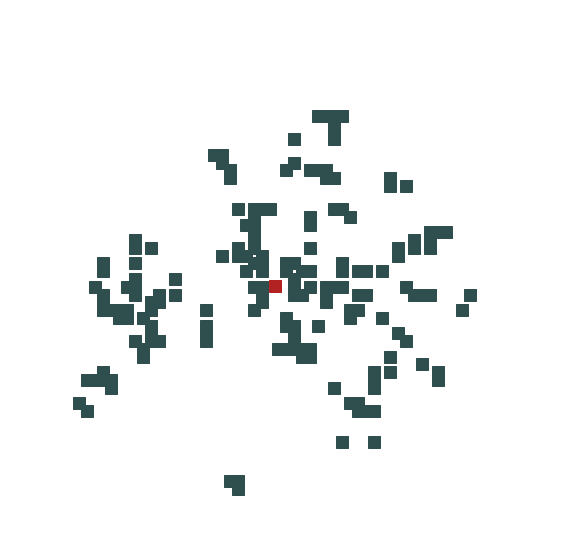

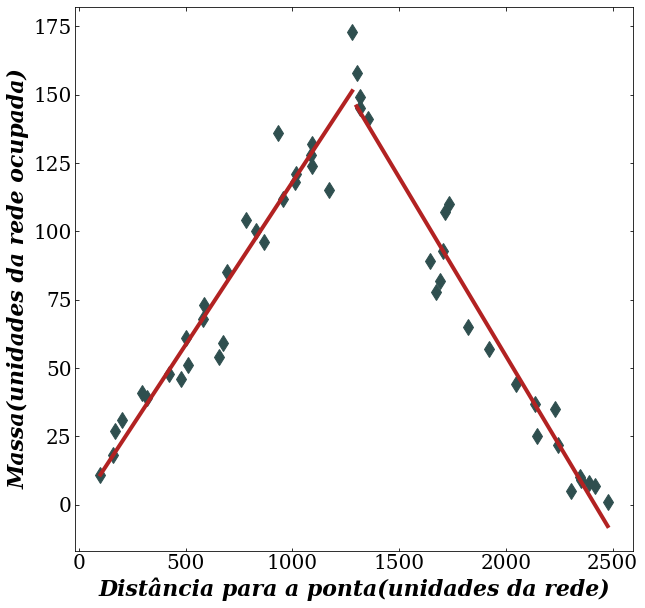

./files/particles/mode_n_ts_1_nb_10000_seed_12_.dat


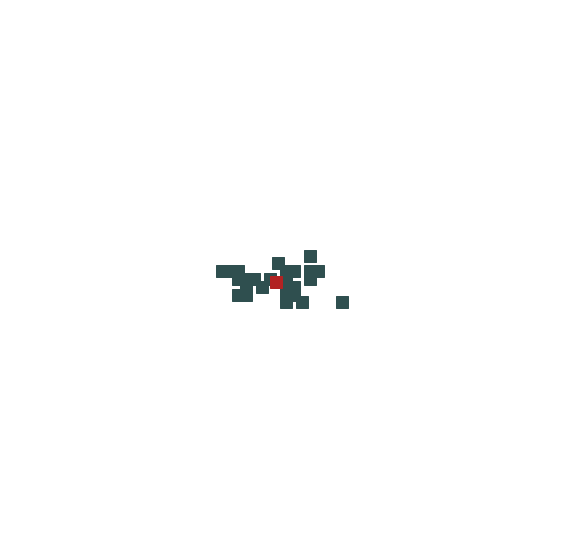

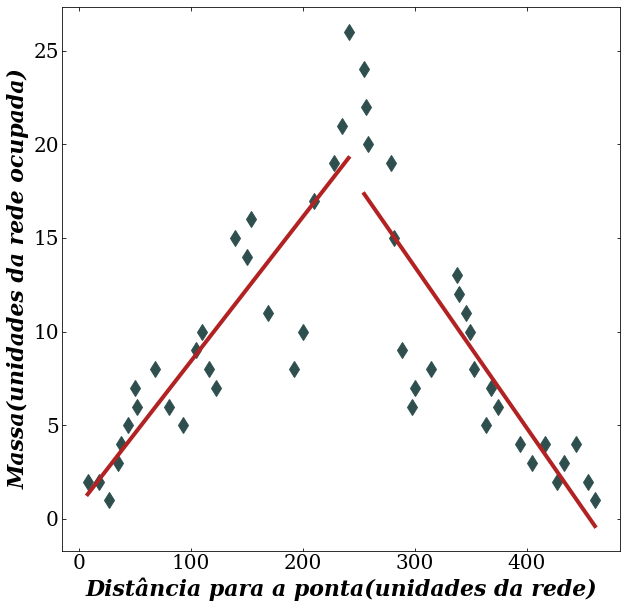

./files/particles/mode_n_ts_1_nb_10000_seed_13_.dat


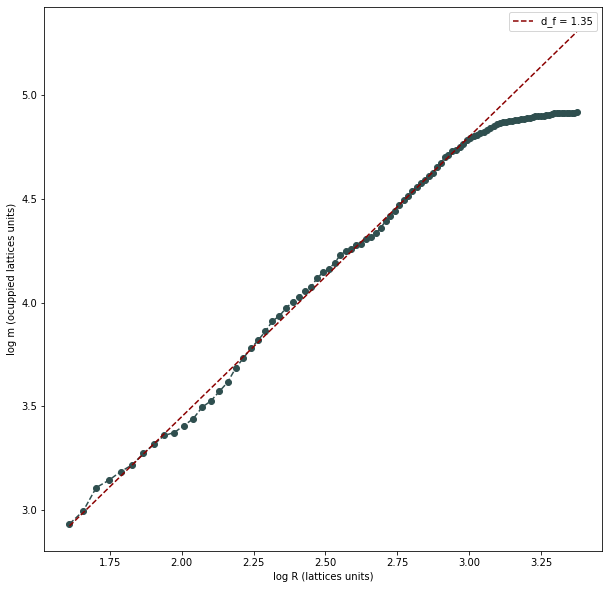

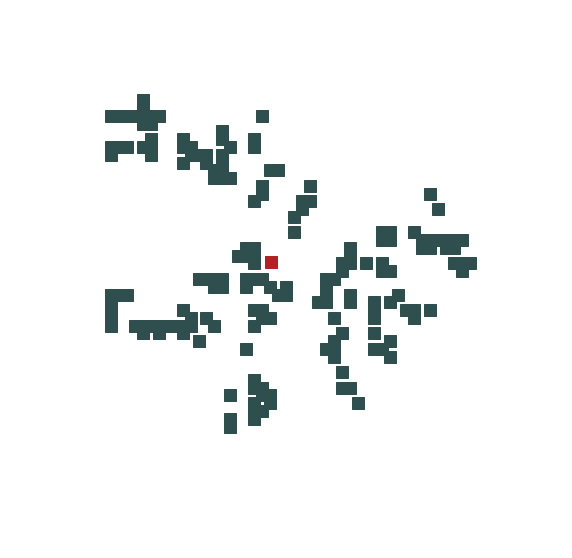

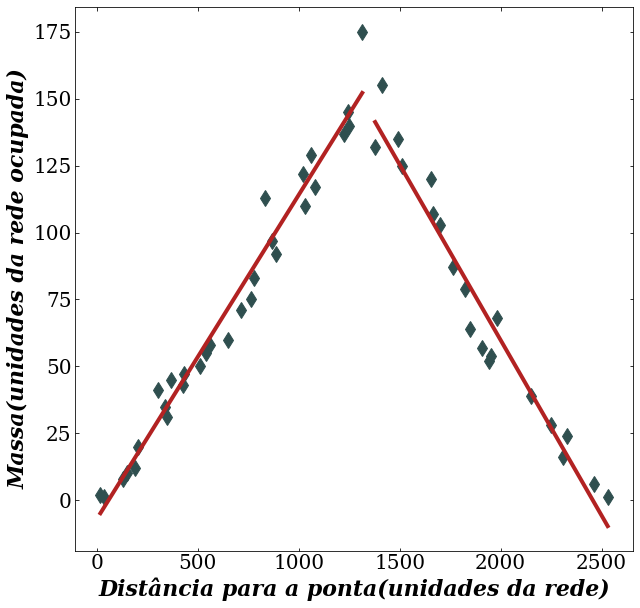

./files/particles/mode_n_ts_10_nb_10000_seed_19_.dat


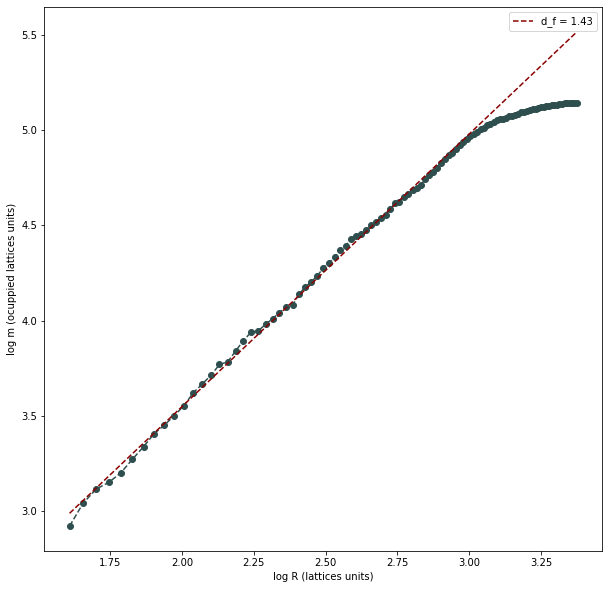

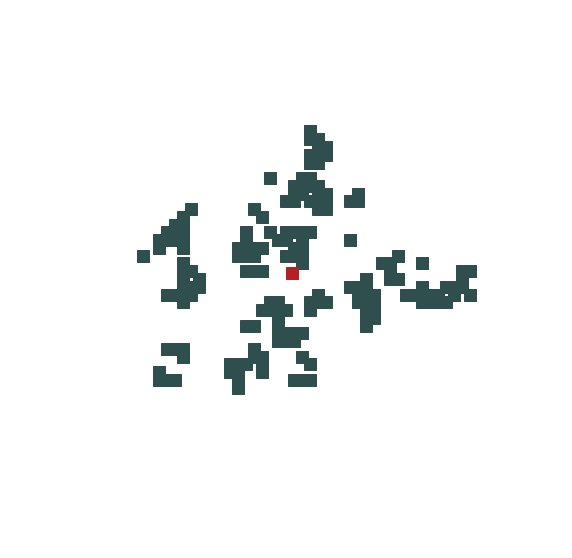

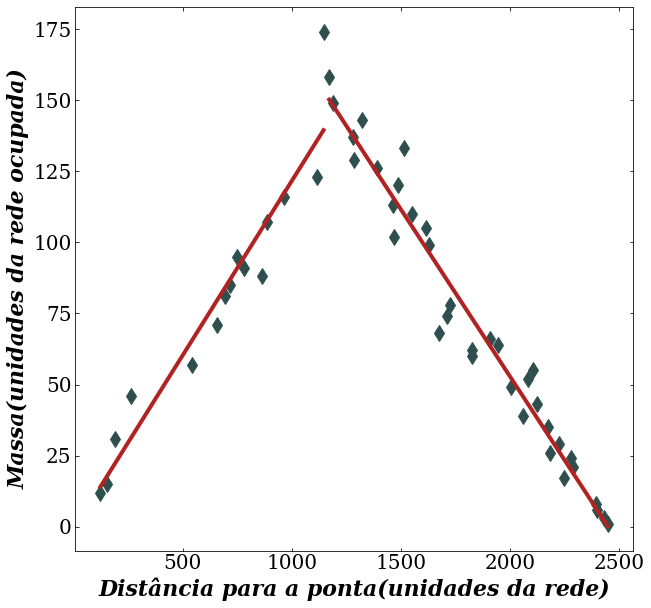

./files/particles/mode_n_ts_10_nb_10000_seed_17_.dat


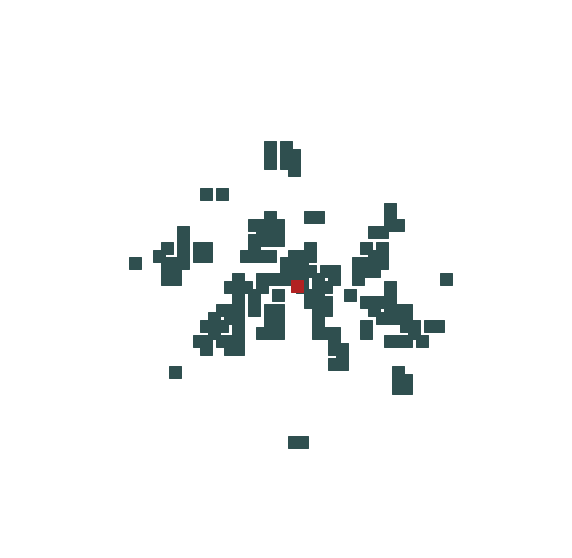

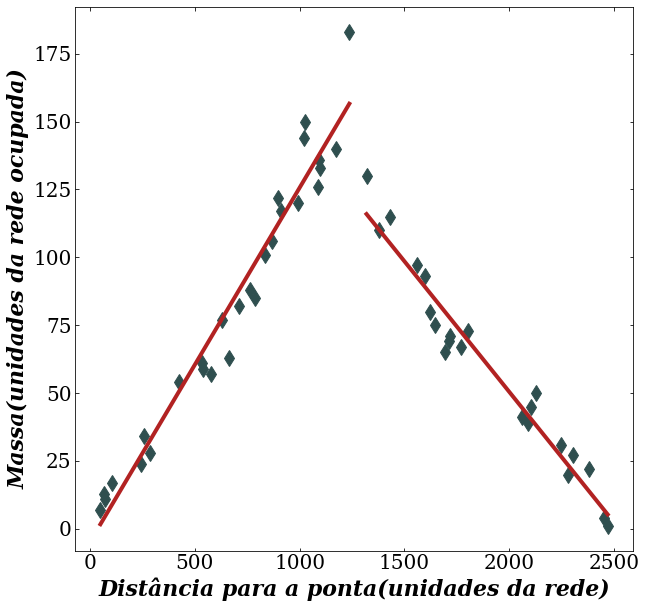

./files/particles/mode_n_ts_10_nb_10000_seed_16_.dat


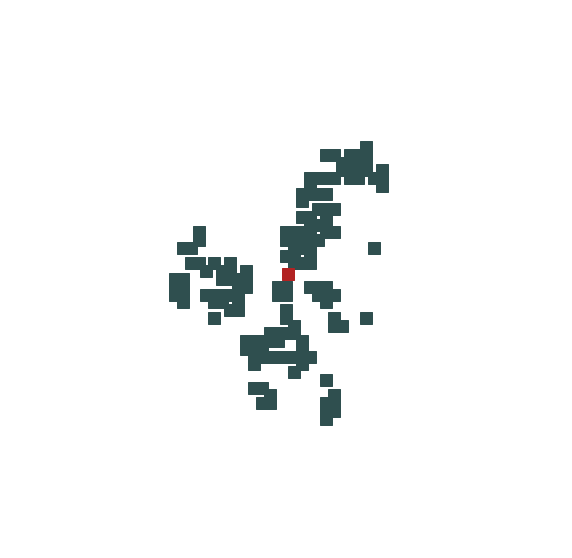

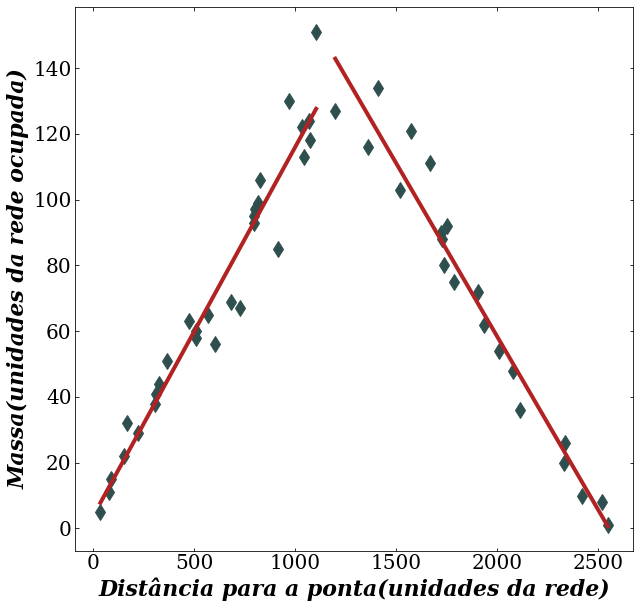

./files/particles/mode_n_ts_10_nb_10000_seed_18_.dat


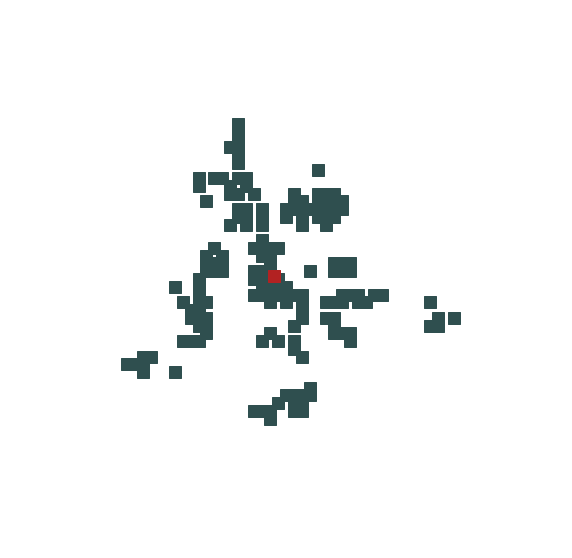

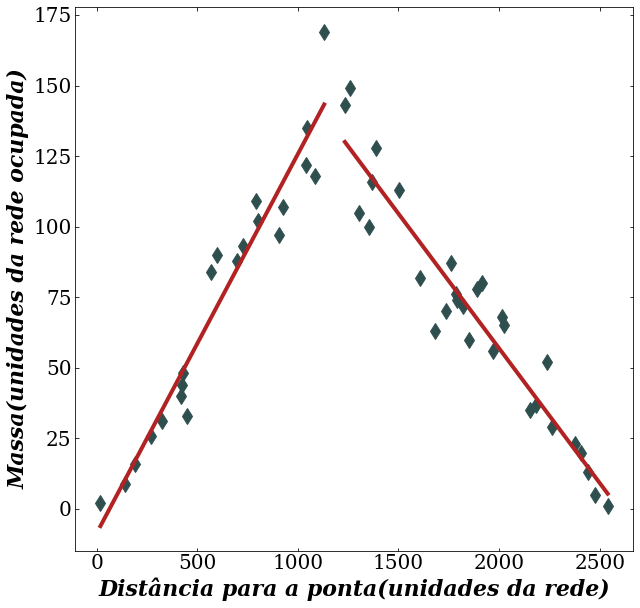

./files/particles/mode_n_ts_10_nb_10000_seed_15_.dat


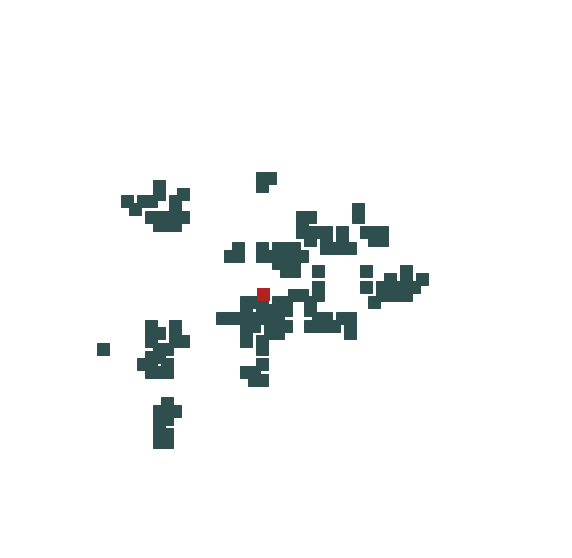

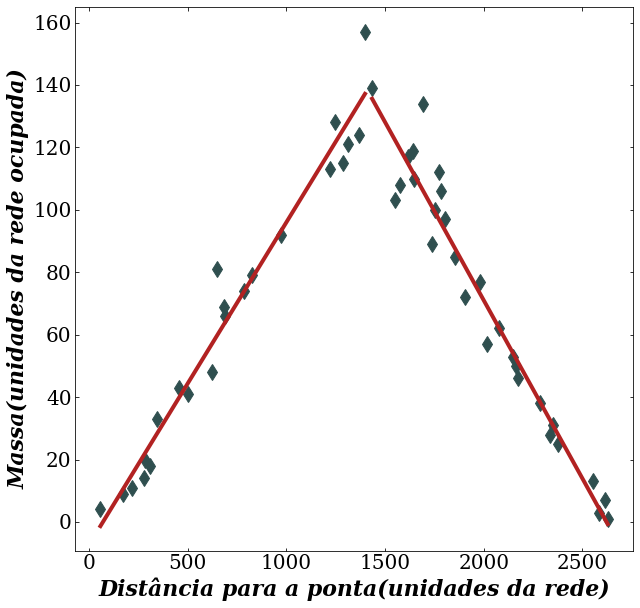

./files/particles/mode_n_ts_100_nb_10000_seed_22_.dat


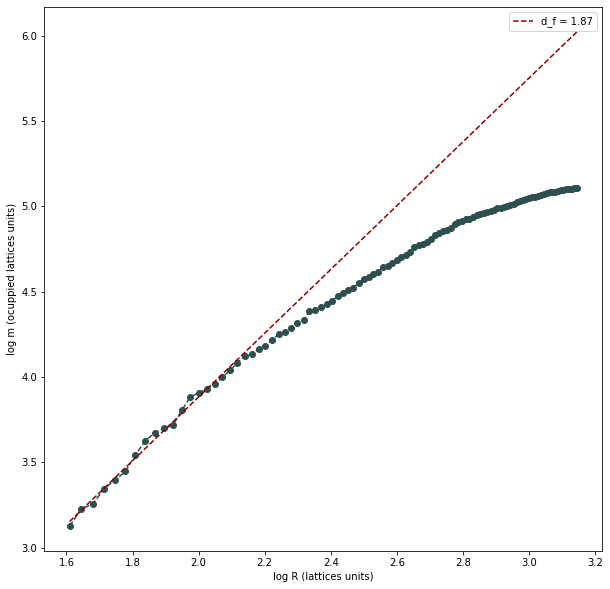

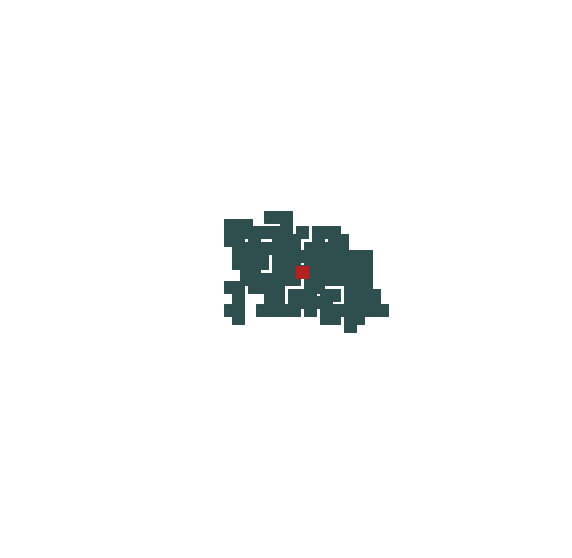

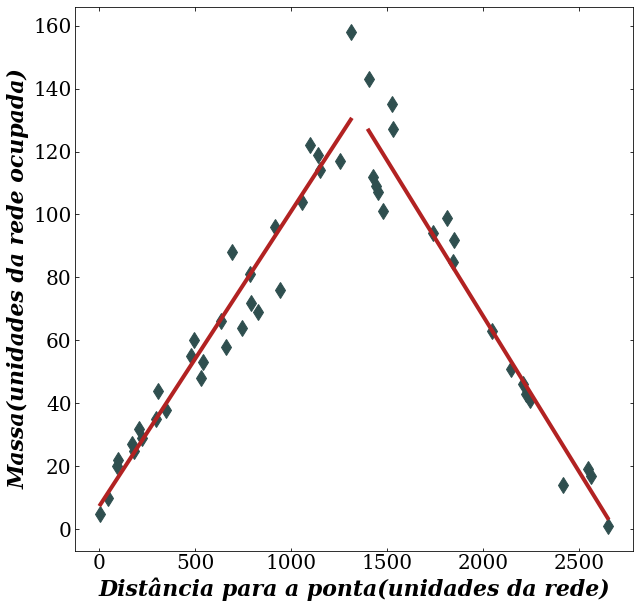

./files/particles/mode_n_ts_100_nb_10000_seed_24_.dat


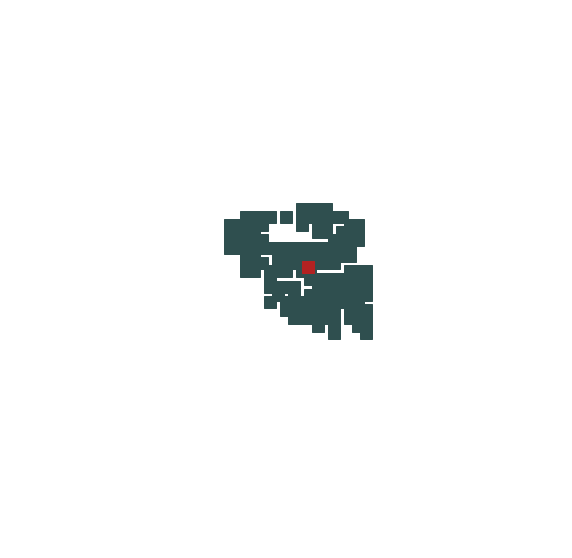

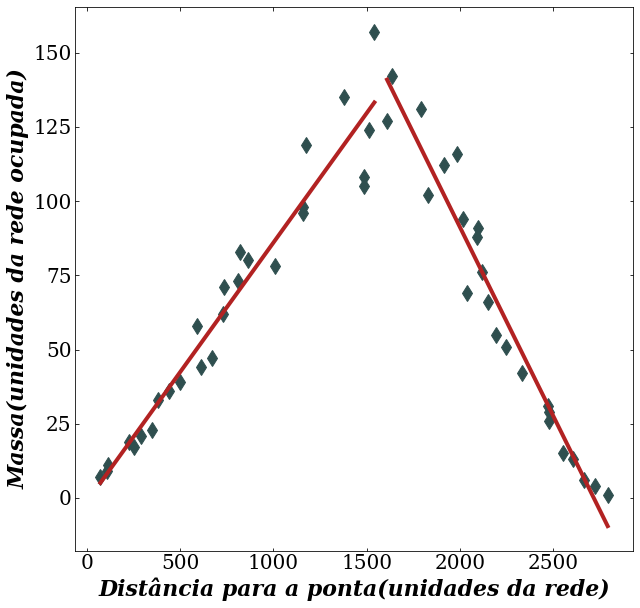

./files/particles/mode_n_ts_100_nb_10000_seed_21_.dat


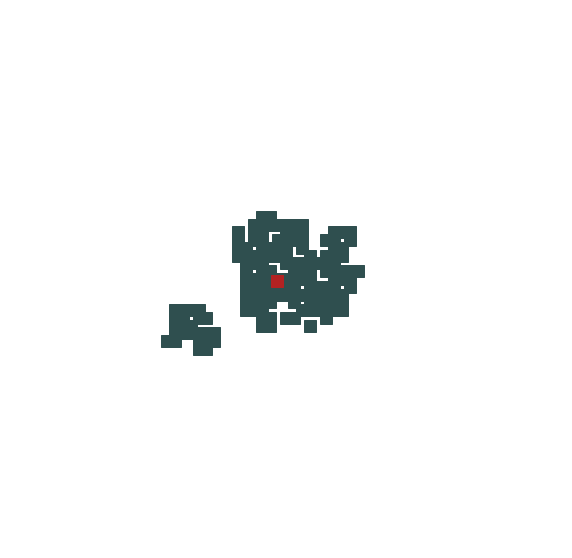

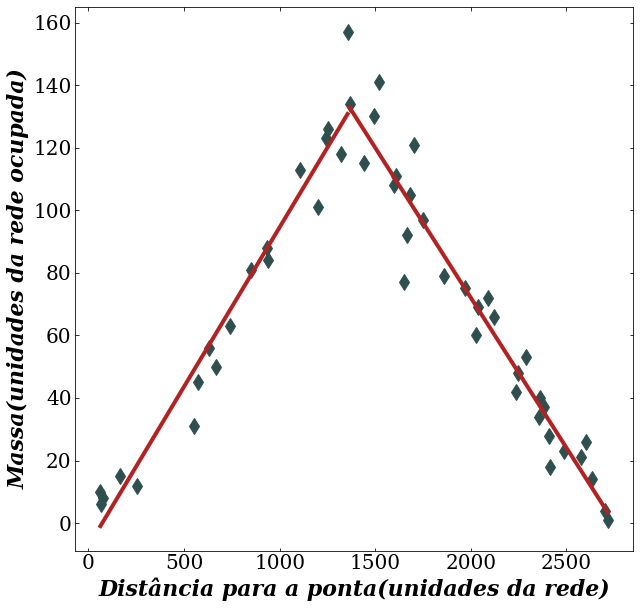

./files/particles/mode_n_ts_100_nb_10000_seed_20_.dat


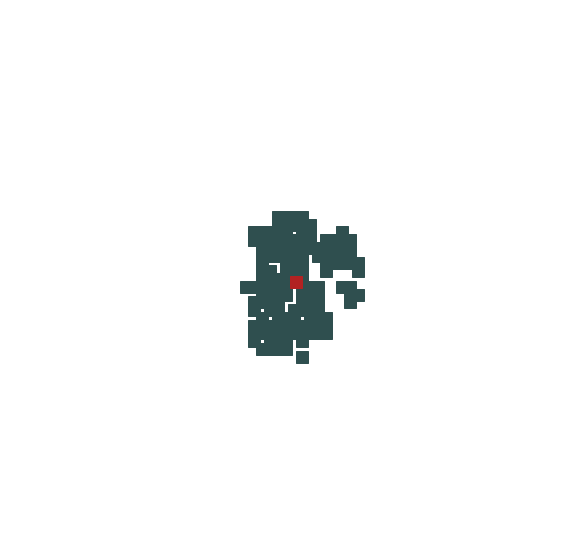

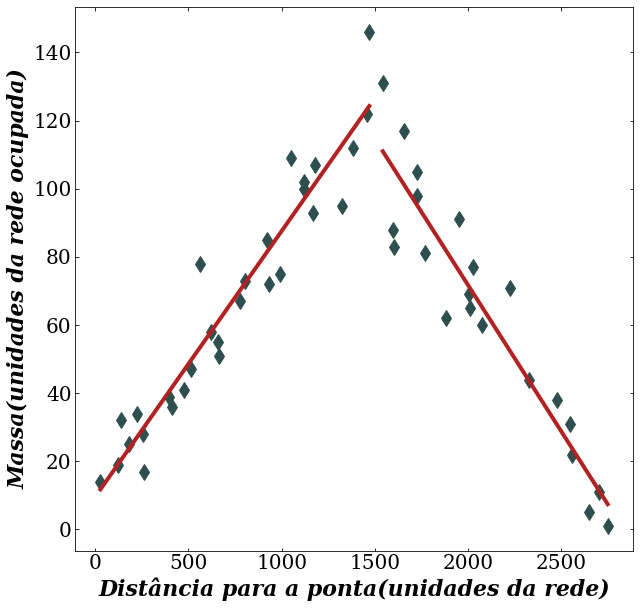

./files/particles/mode_n_ts_100_nb_10000_seed_23_.dat


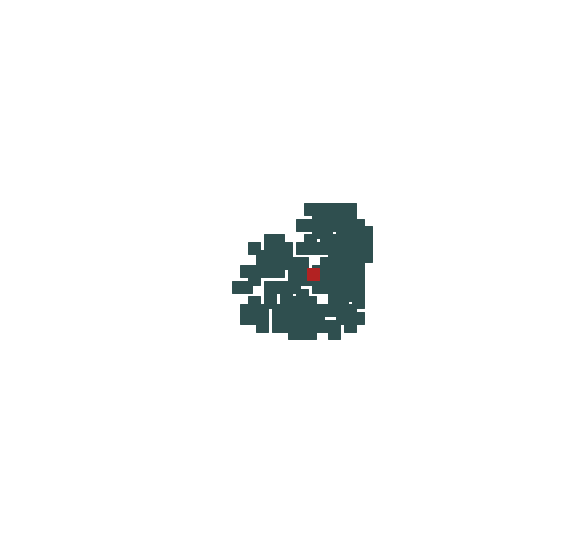

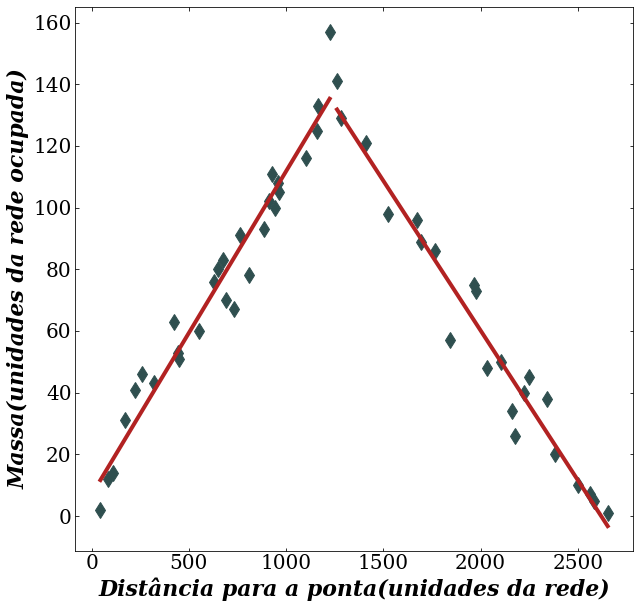

./files/particles/mode_n_ts_1000_nb_10000_seed_27_.dat


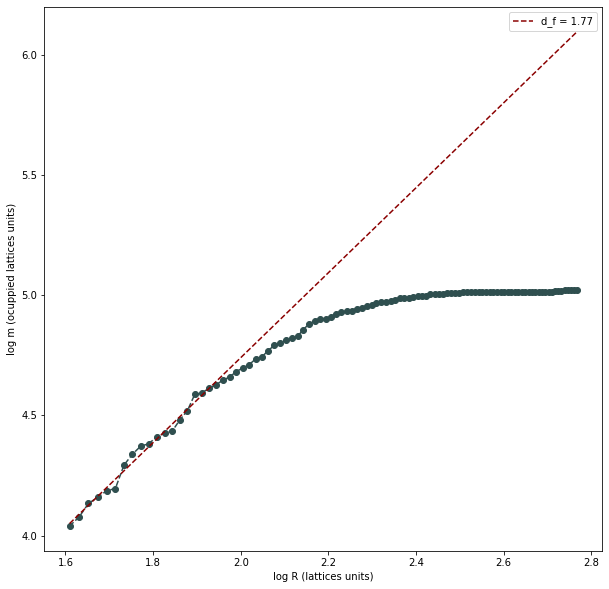

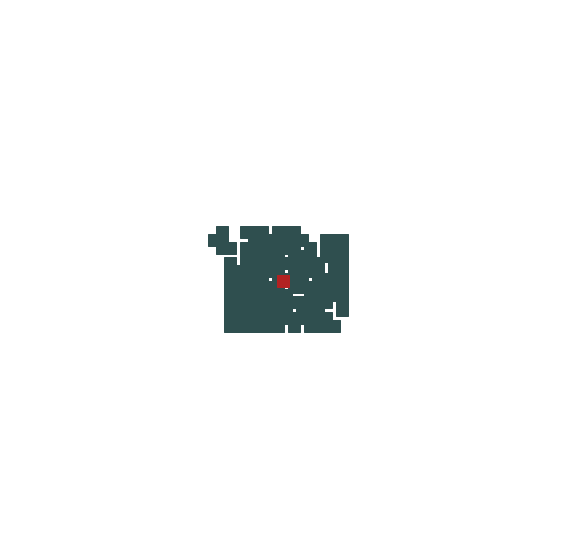

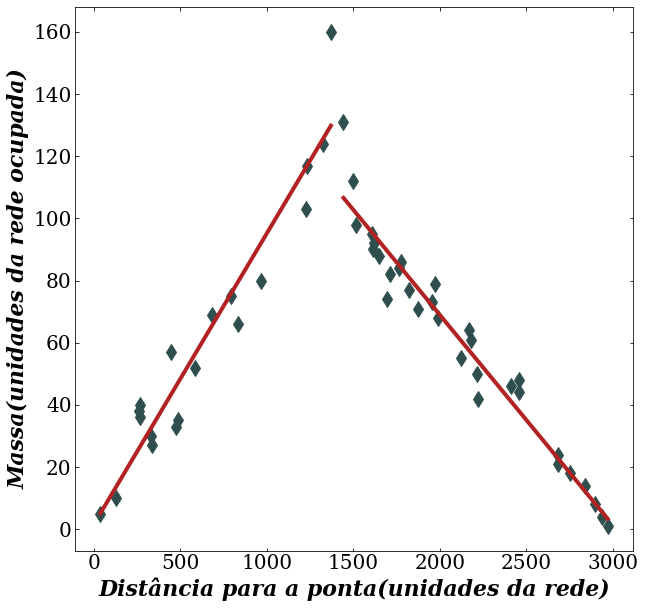

./files/particles/mode_n_ts_1000_nb_10000_seed_25_.dat


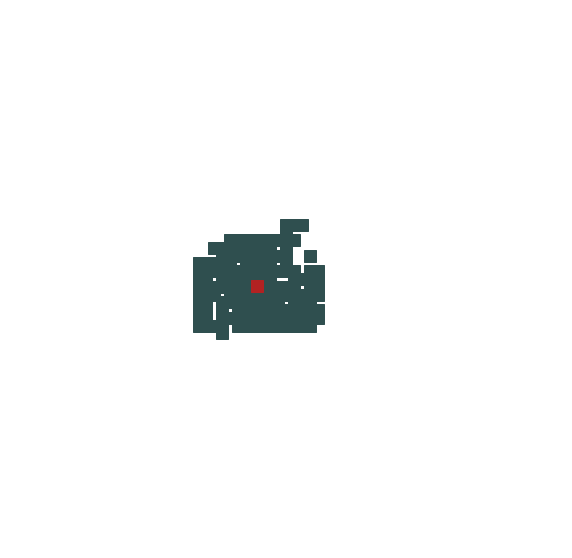

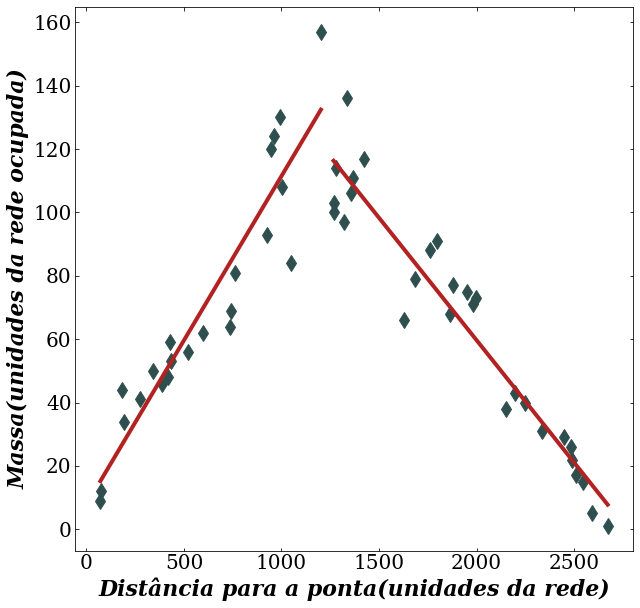

./files/particles/mode_n_ts_1000_nb_10000_seed_26_.dat


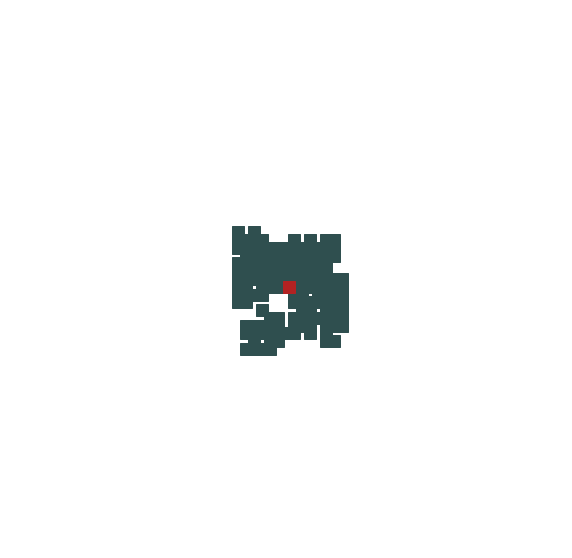

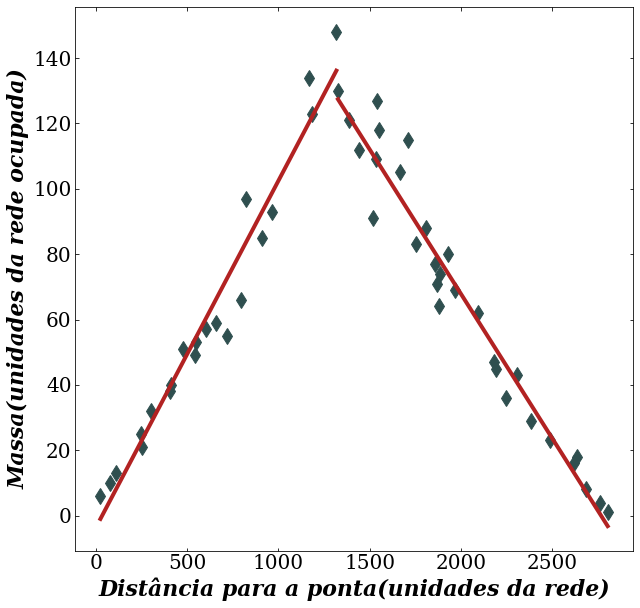

./files/particles/mode_n_ts_1000_nb_10000_seed_29_.dat


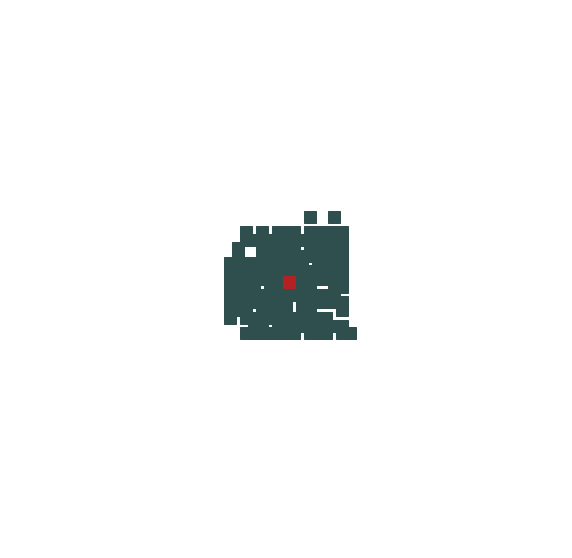

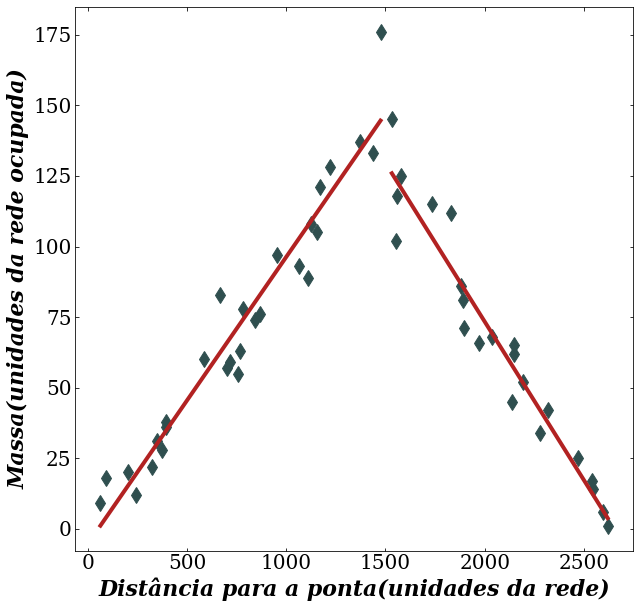

./files/particles/mode_n_ts_1000_nb_10000_seed_28_.dat


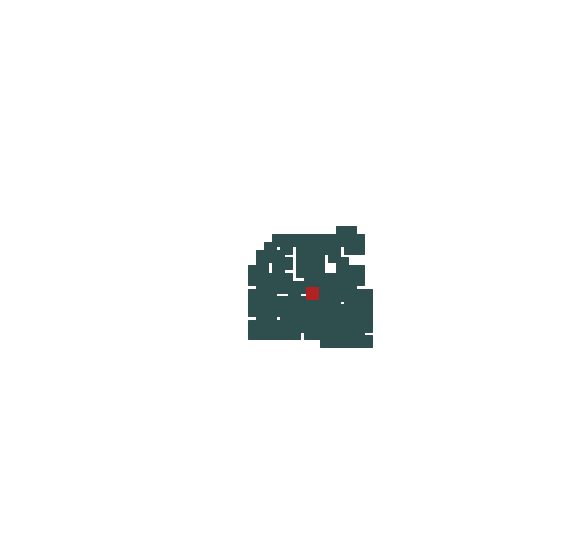

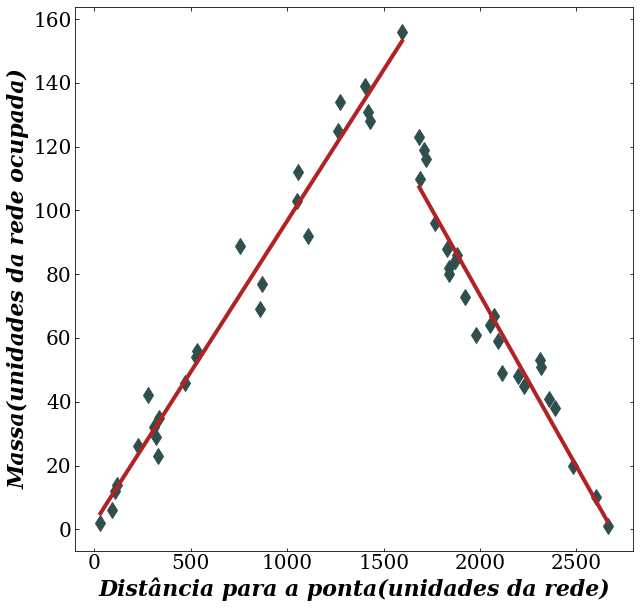

./files/particles/mode_n_ts_10000_nb_10000_seed_53_.dat


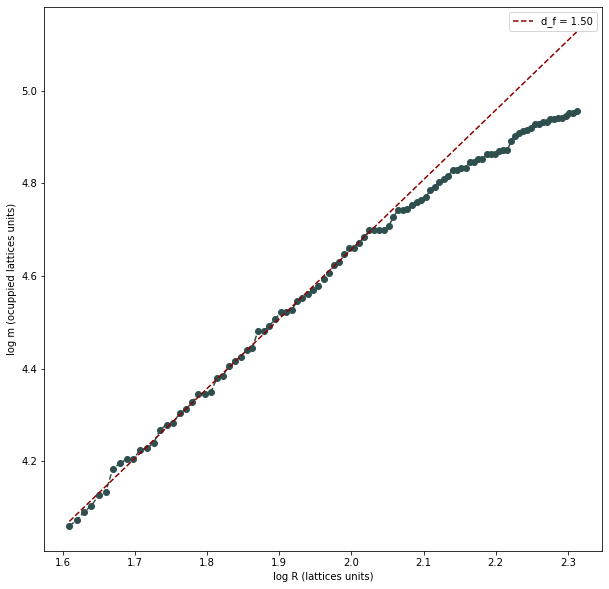

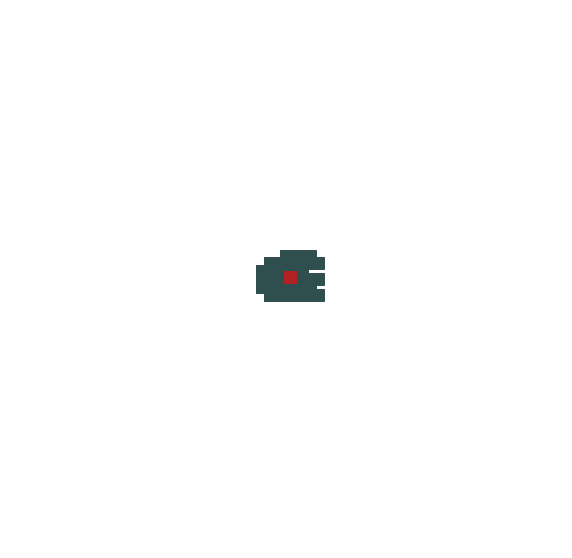

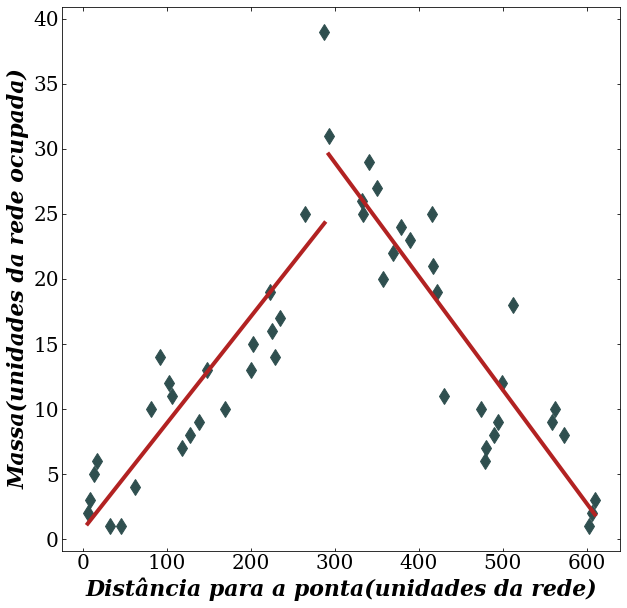

./files/particles/mode_n_ts_10000_nb_10000_seed_56_.dat


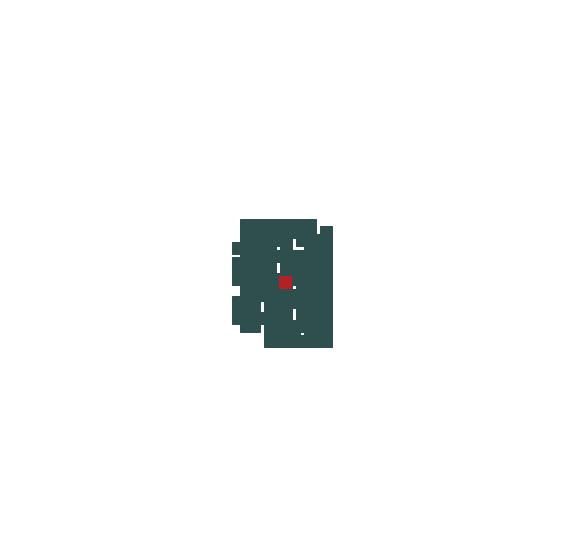

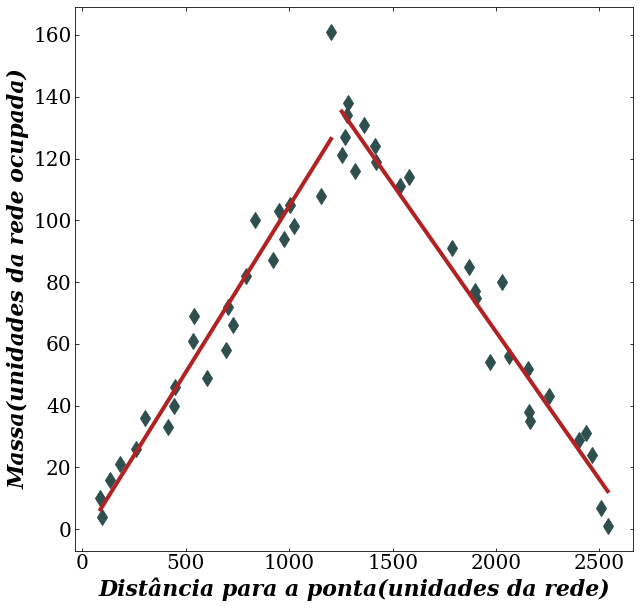

./files/particles/mode_n_ts_10000_nb_10000_seed_52_.dat


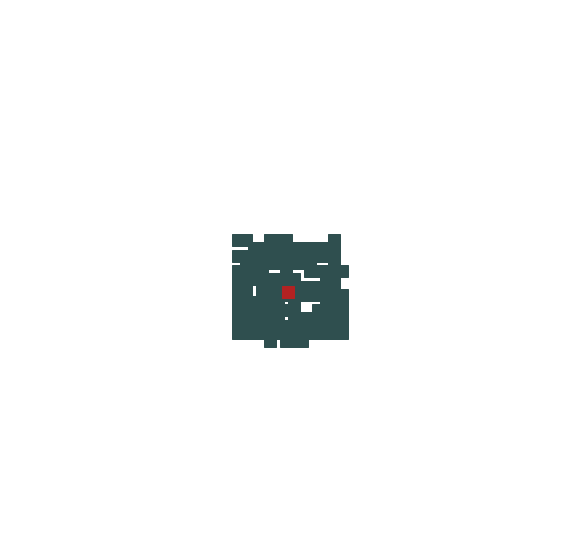

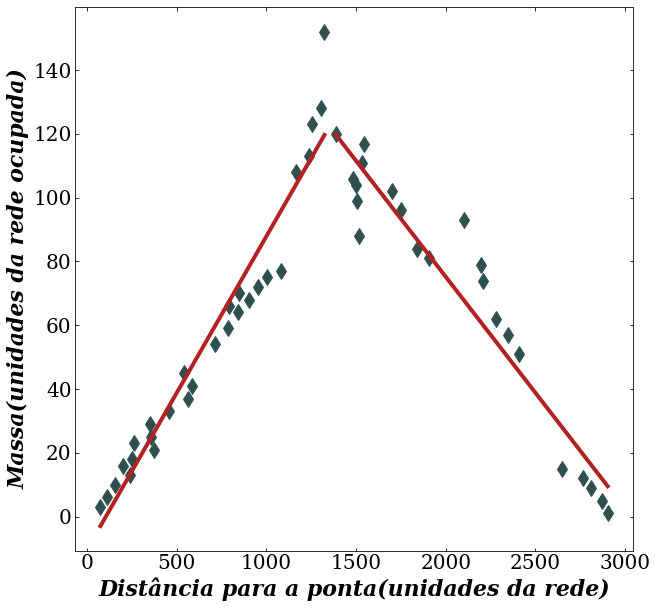

./files/particles/mode_n_ts_10000_nb_10000_seed_58_.dat


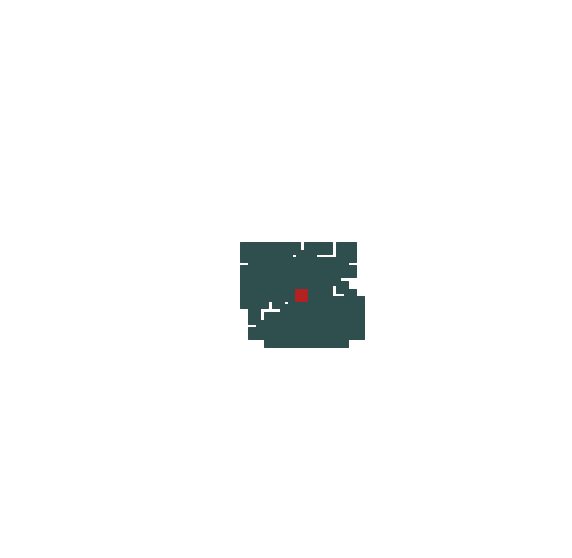

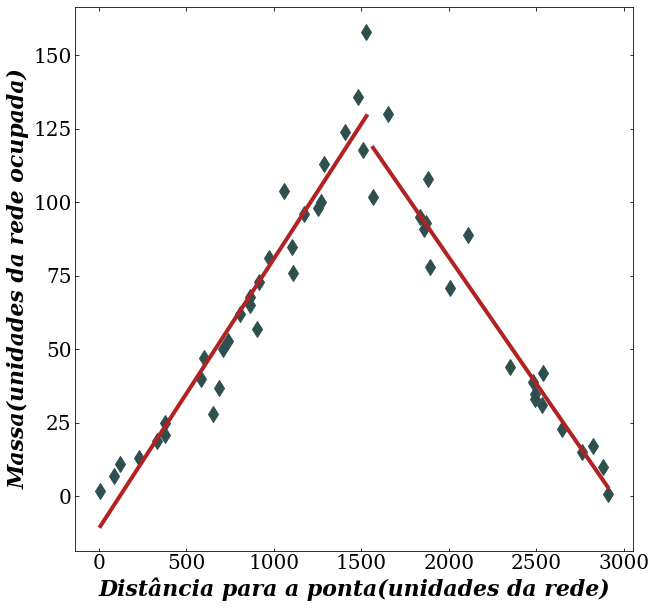

./files/particles/mode_n_ts_10000_nb_10000_seed_60_.dat


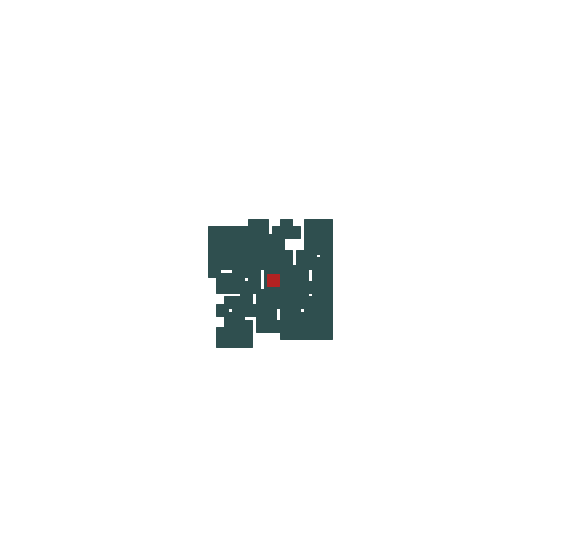

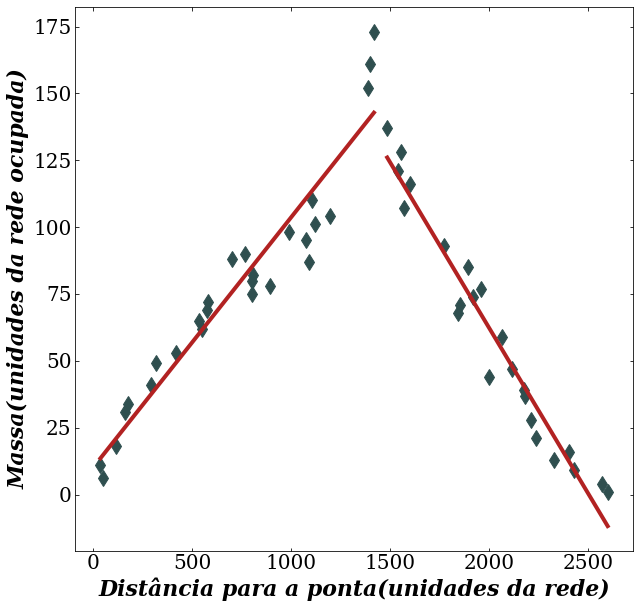

./files/particles/mode_n_ts_10000_nb_10000_seed_62_.dat


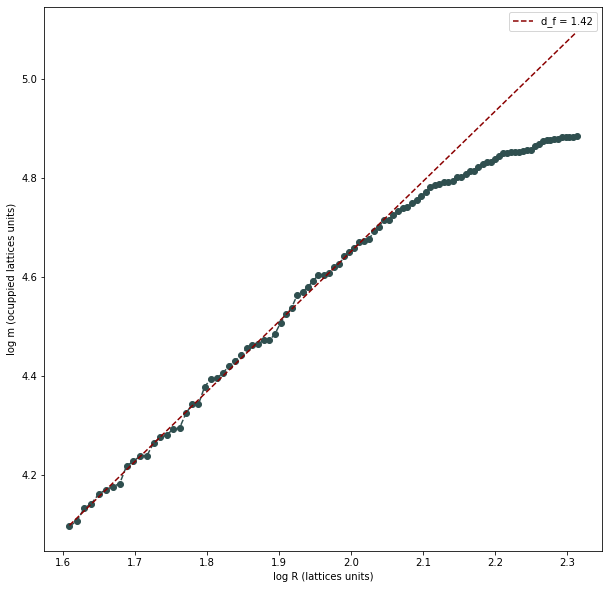

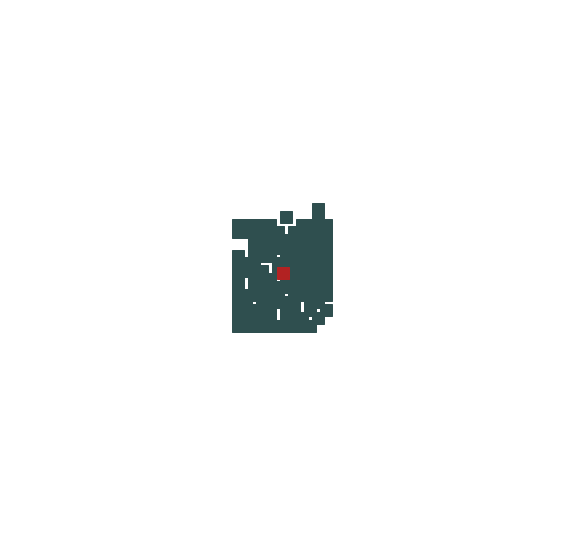

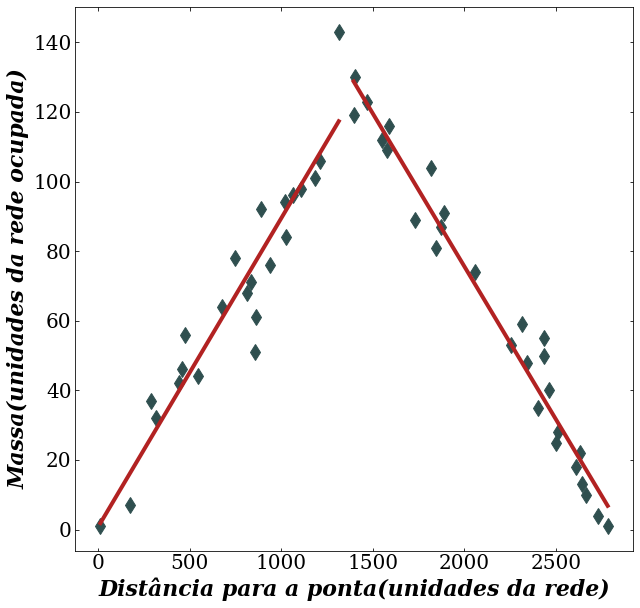

./files/particles/mode_s_ts_1_nb_10000_seed_32_.dat


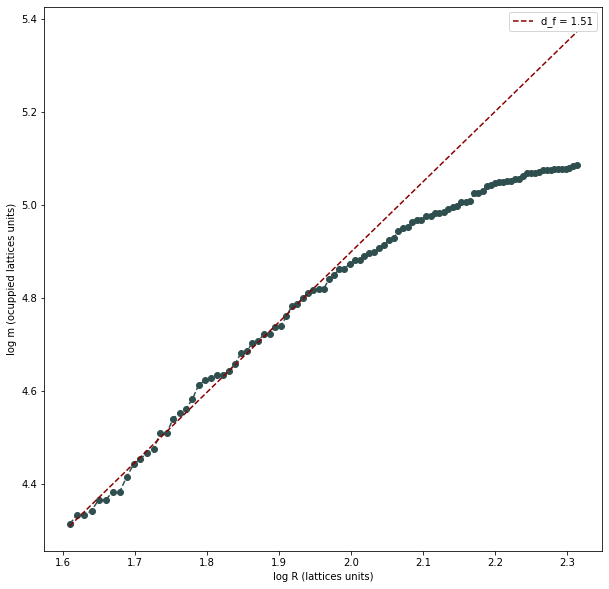

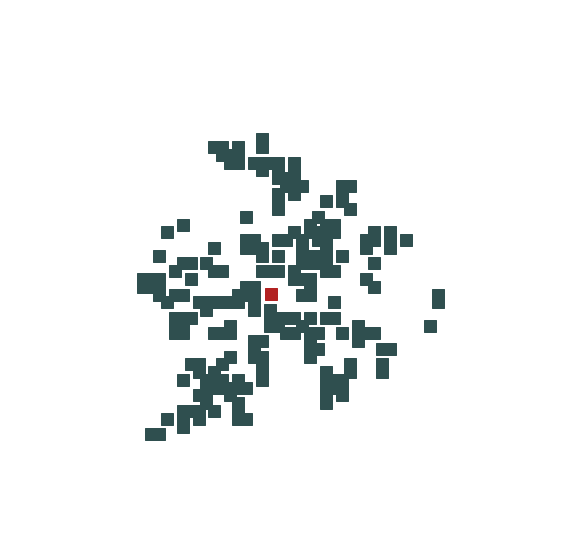

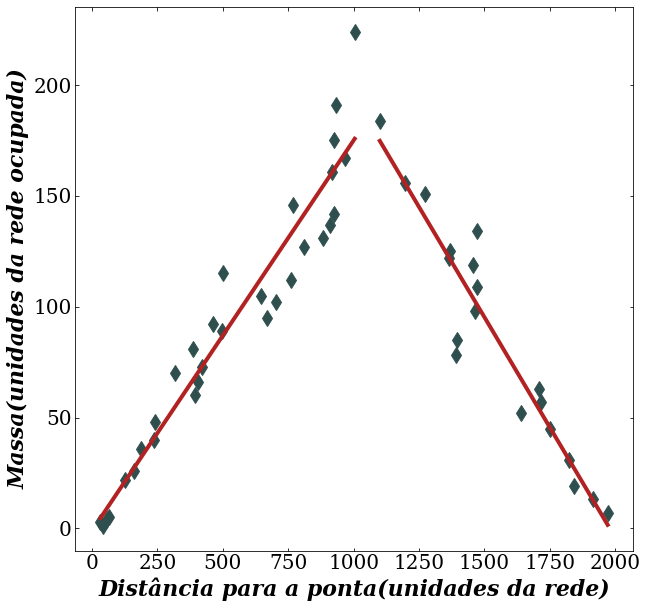

./files/particles/mode_s_ts_1_nb_10000_seed_34_.dat


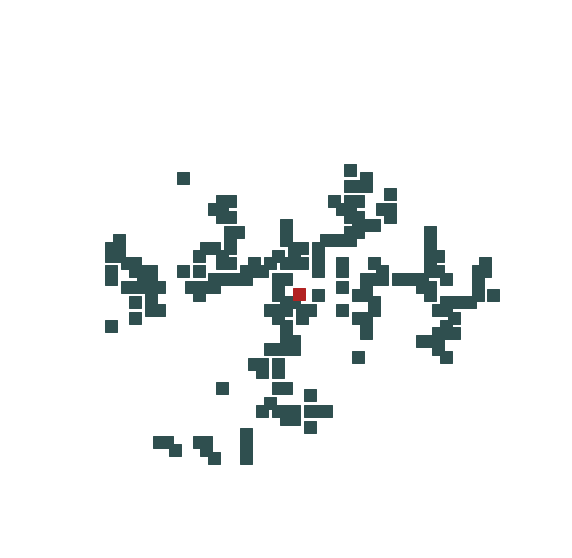

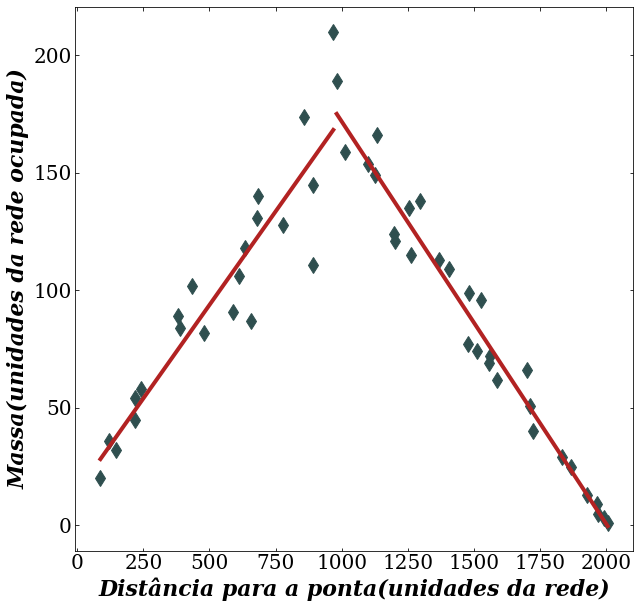

./files/particles/mode_s_ts_1_nb_10000_seed_33_.dat


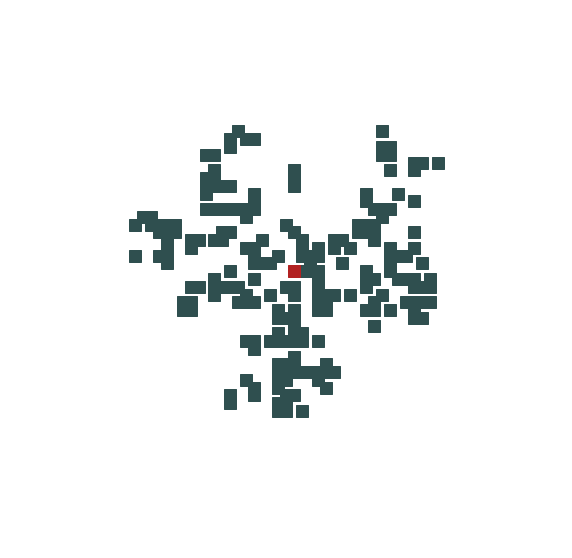

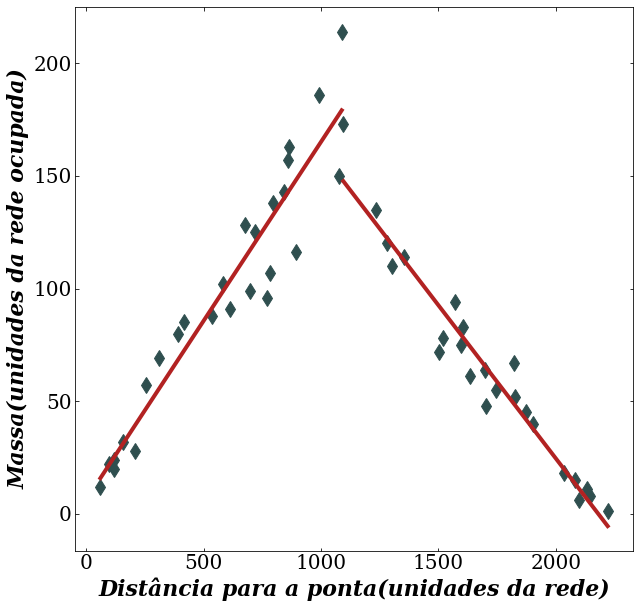

./files/particles/mode_s_ts_1_nb_10000_seed_31_.dat


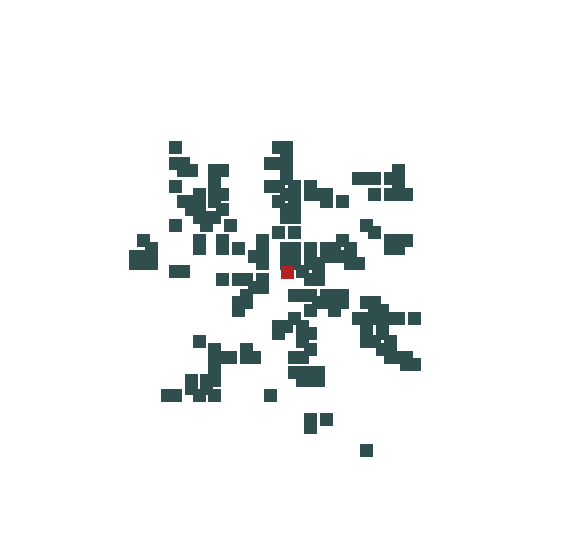

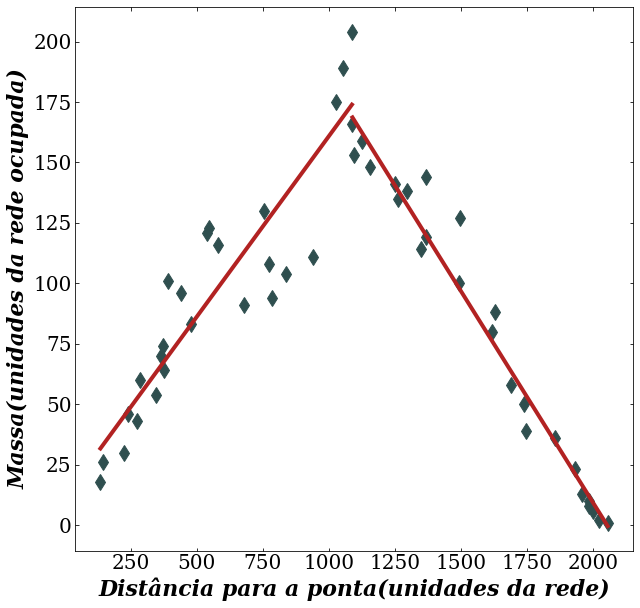

./files/particles/mode_s_ts_1_nb_10000_seed_30_.dat


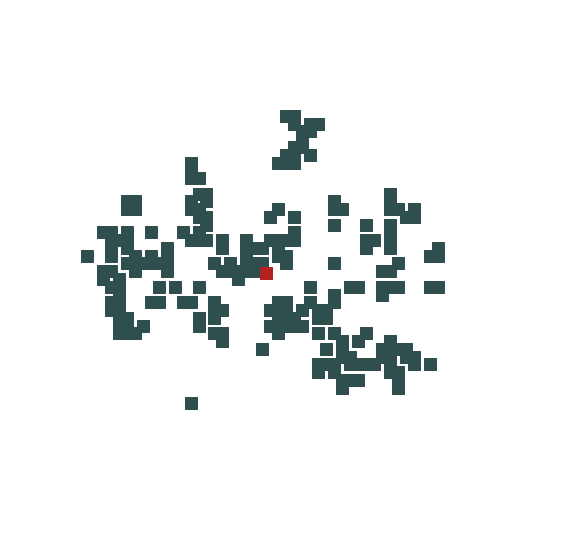

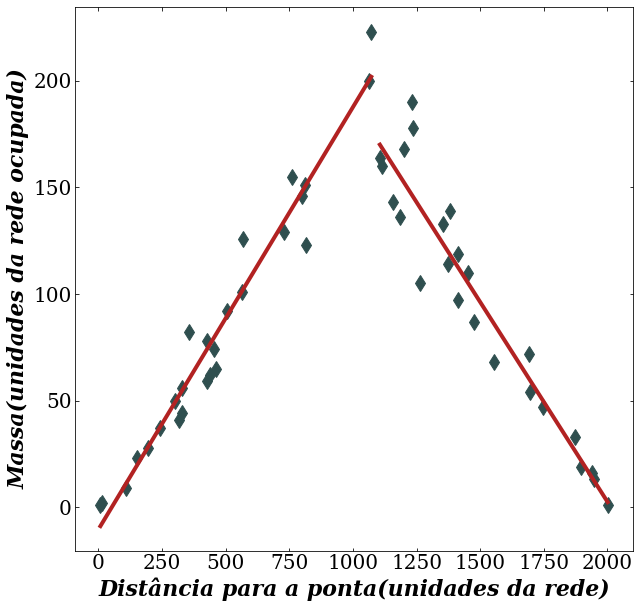

./files/particles/mode_s_ts_10_nb_10000_seed_38_.dat


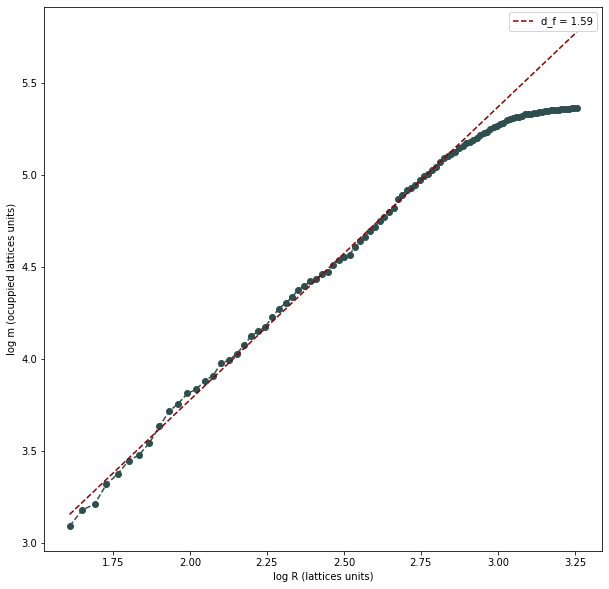

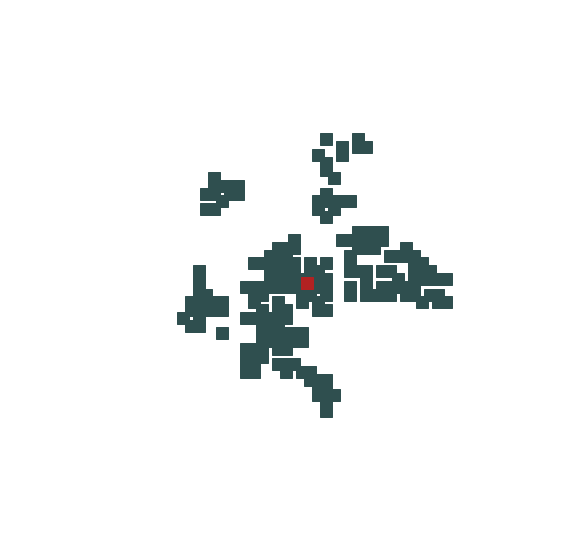

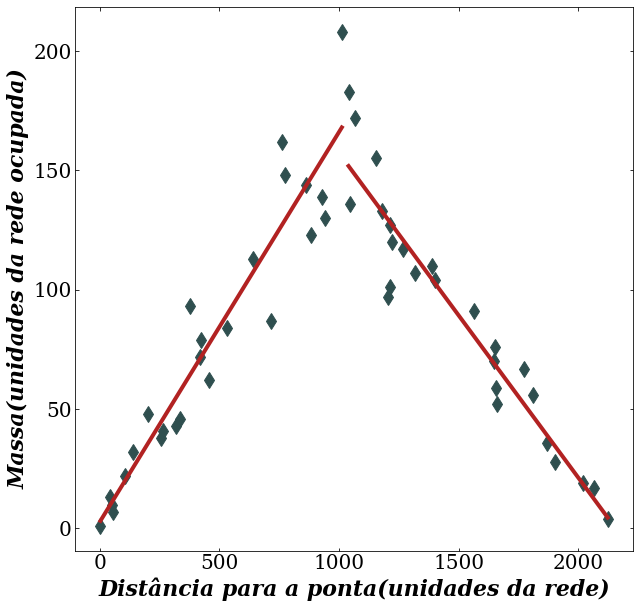

./files/particles/mode_s_ts_10_nb_10000_seed_37_.dat


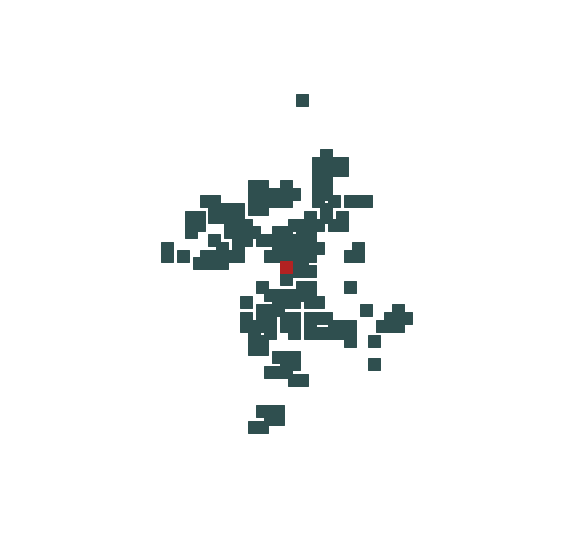

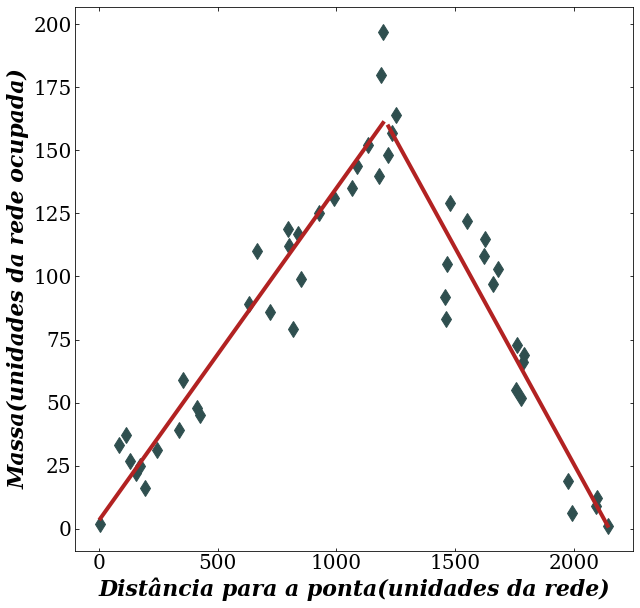

./files/particles/mode_s_ts_10_nb_10000_seed_36_.dat


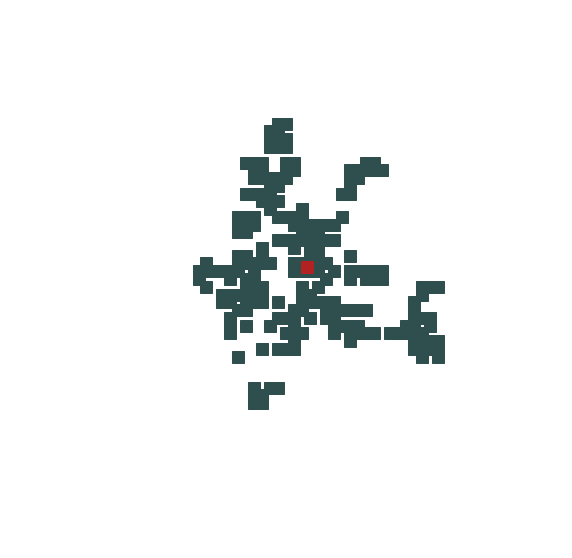

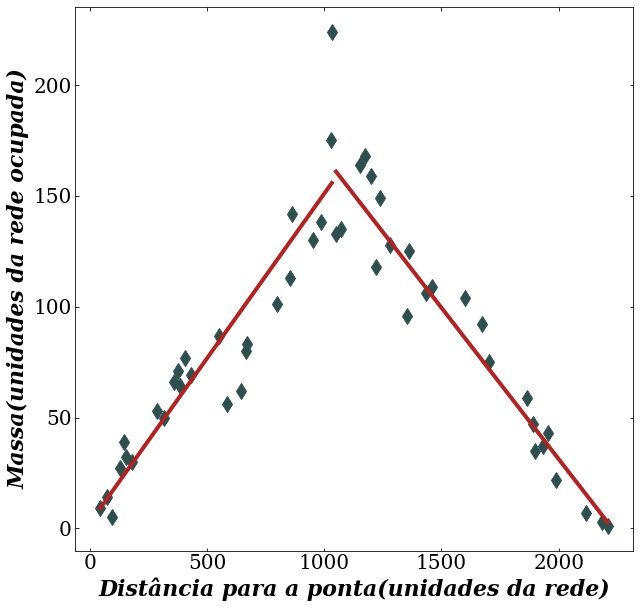

./files/particles/mode_s_ts_10_nb_10000_seed_39_.dat


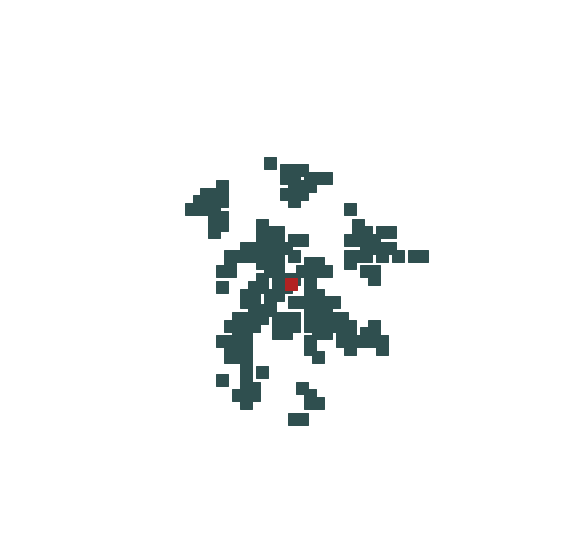

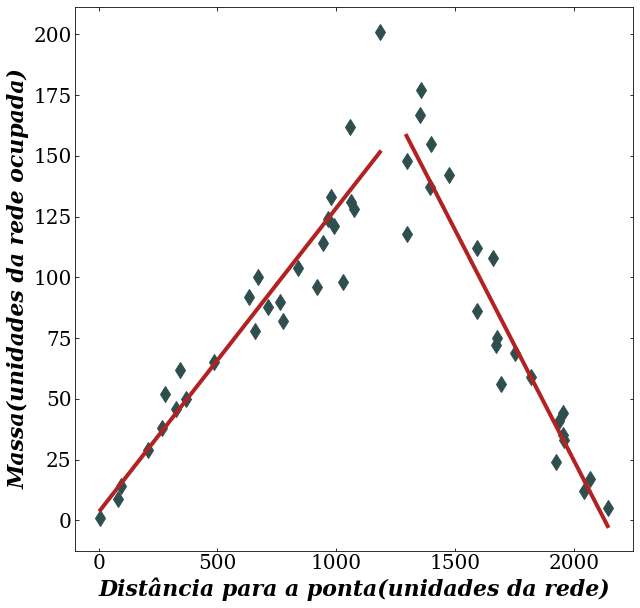

./files/particles/mode_s_ts_10_nb_10000_seed_35_.dat


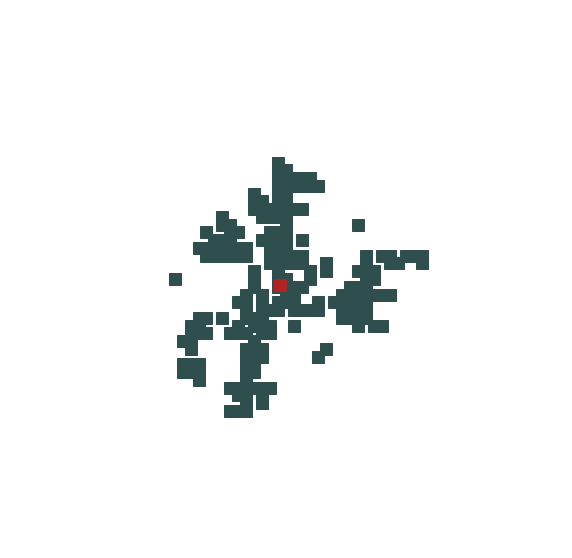

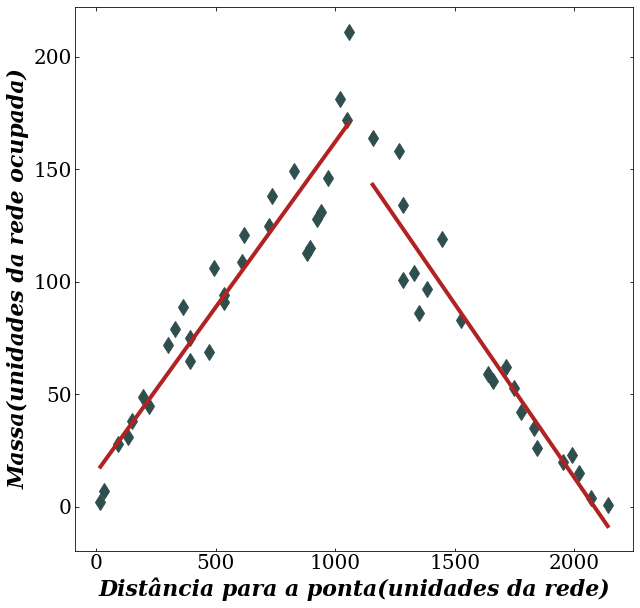

./files/particles/mode_s_ts_100_nb_10000_seed_41_.dat


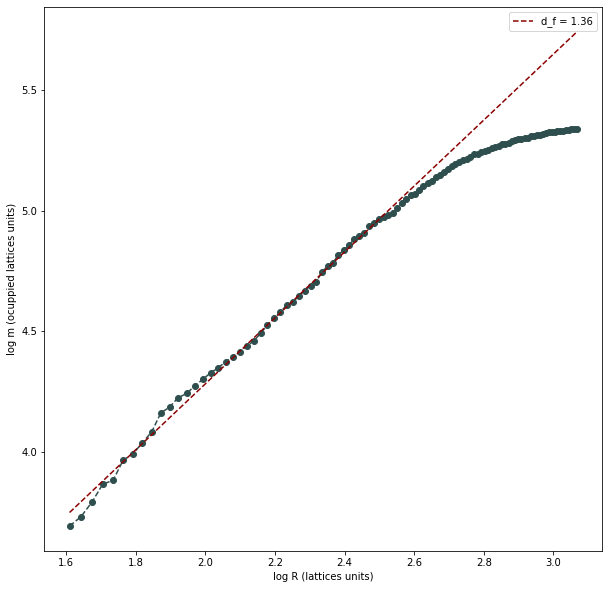

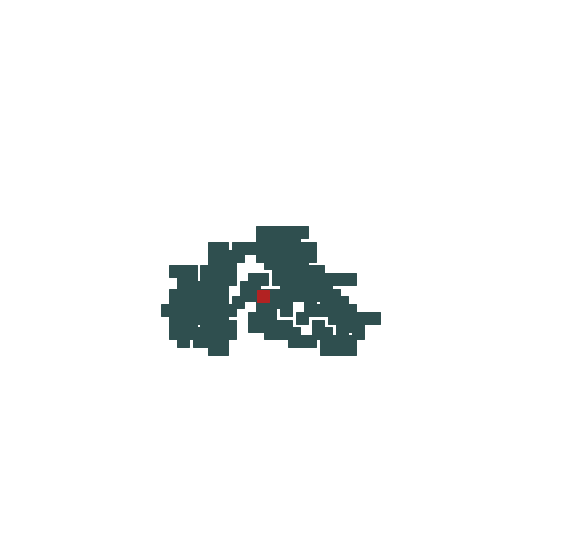

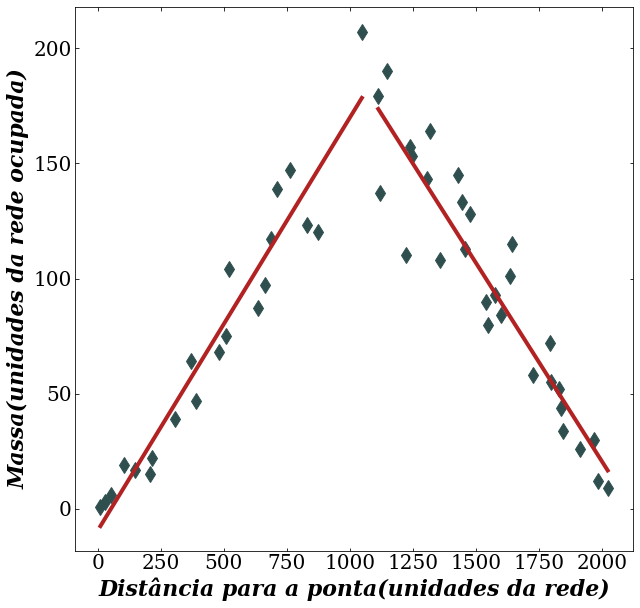

./files/particles/mode_s_ts_100_nb_10000_seed_43_.dat


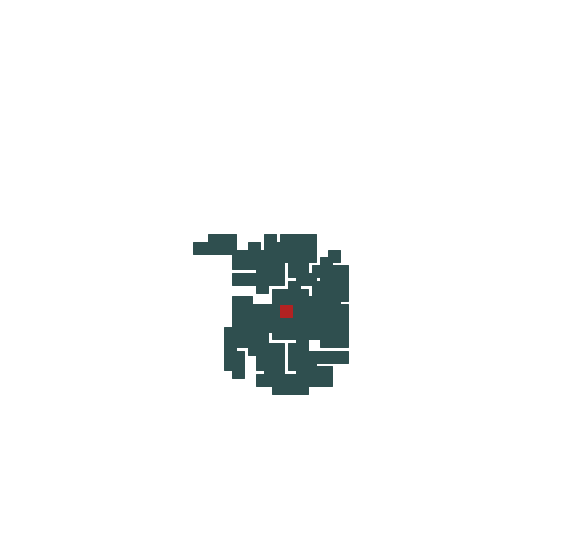

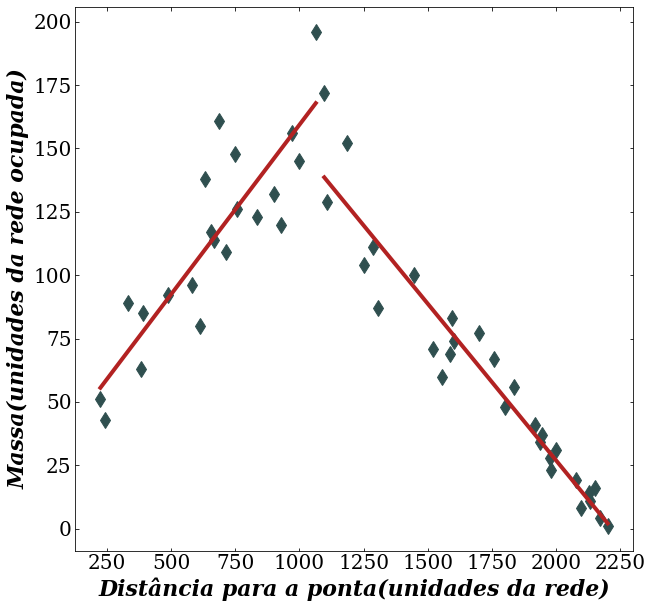

./files/particles/mode_s_ts_100_nb_10000_seed_44_.dat


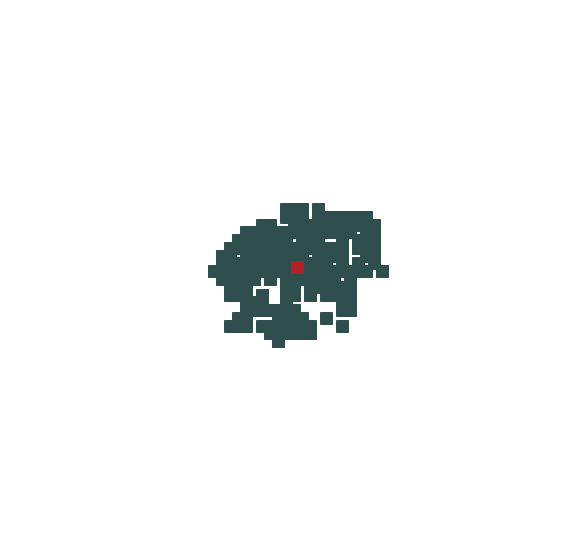

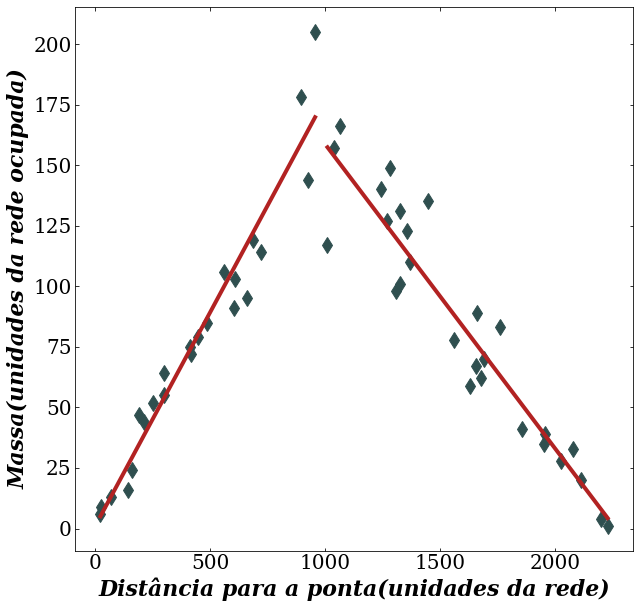

./files/particles/mode_s_ts_100_nb_10000_seed_42_.dat


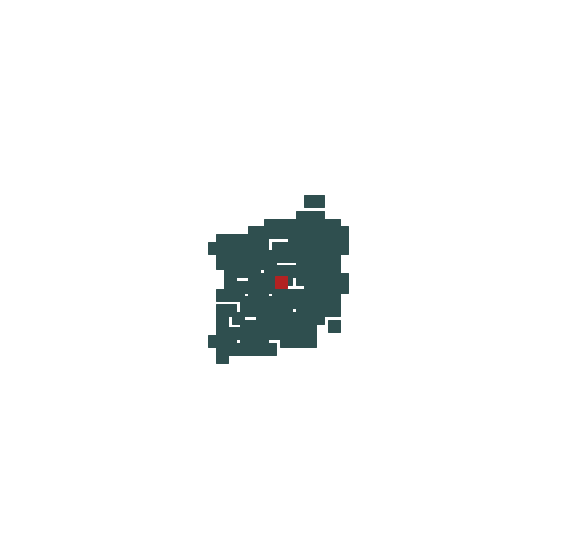

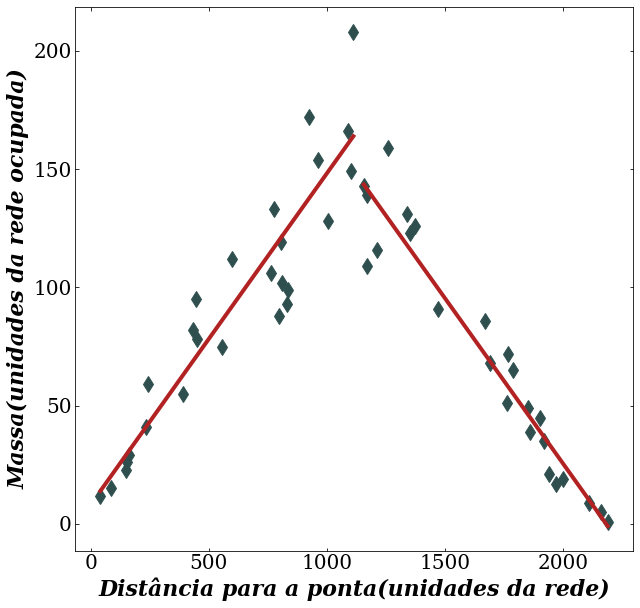

./files/particles/mode_s_ts_100_nb_10000_seed_40_.dat


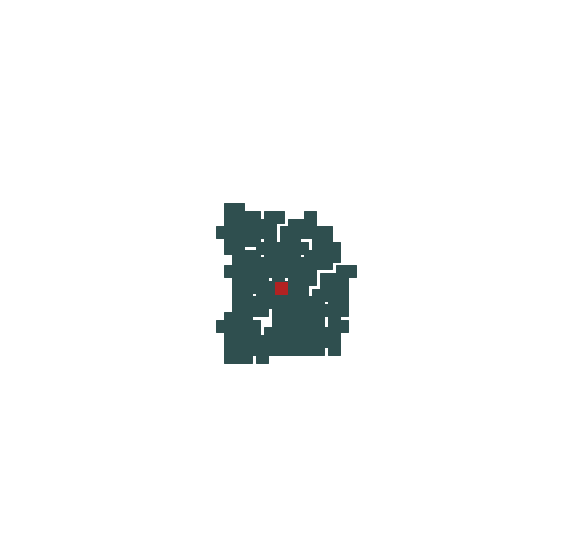

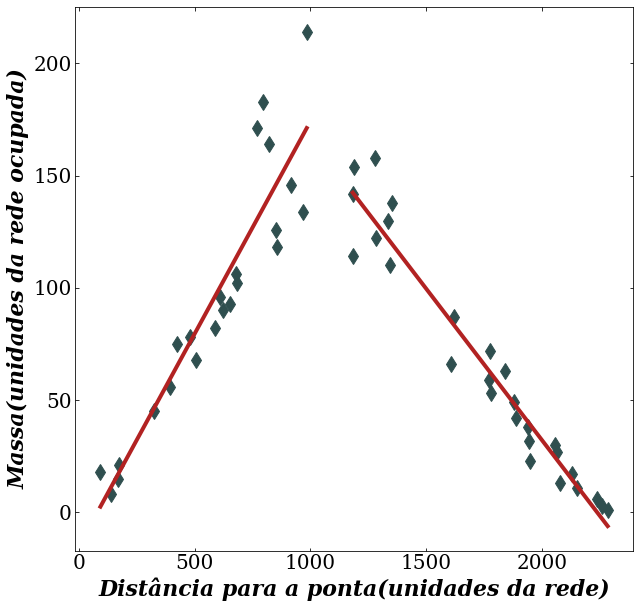

./files/particles/mode_s_ts_1000_nb_10000_seed_48_.dat


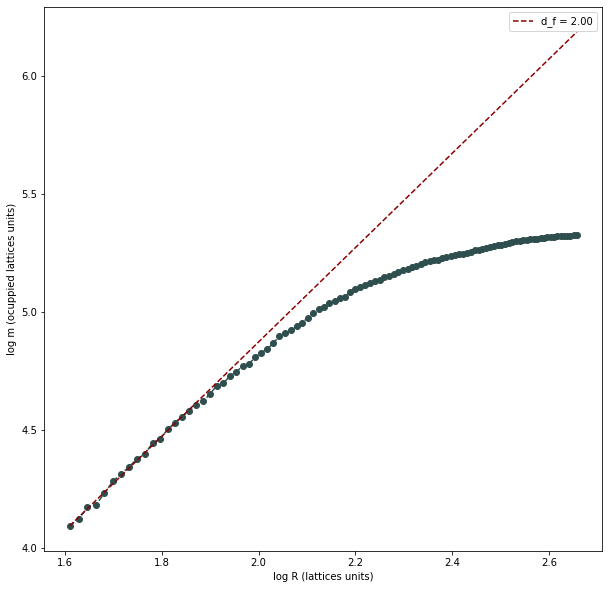

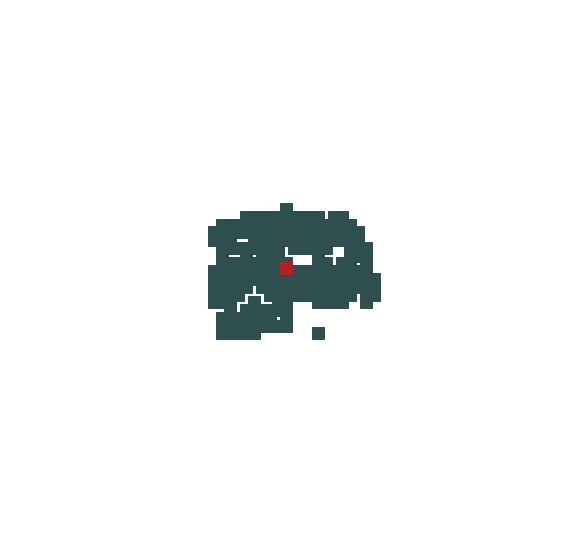

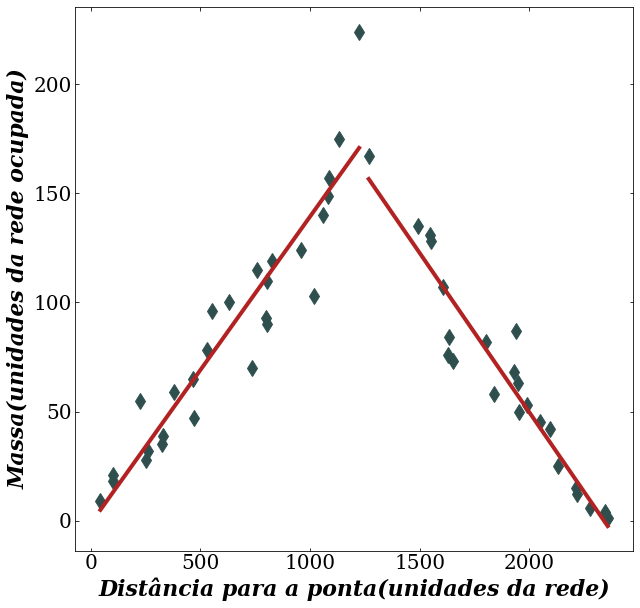

./files/particles/mode_s_ts_1000_nb_10000_seed_46_.dat


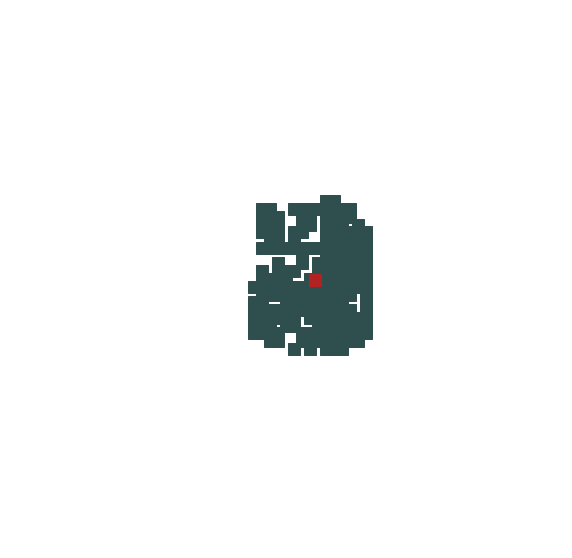

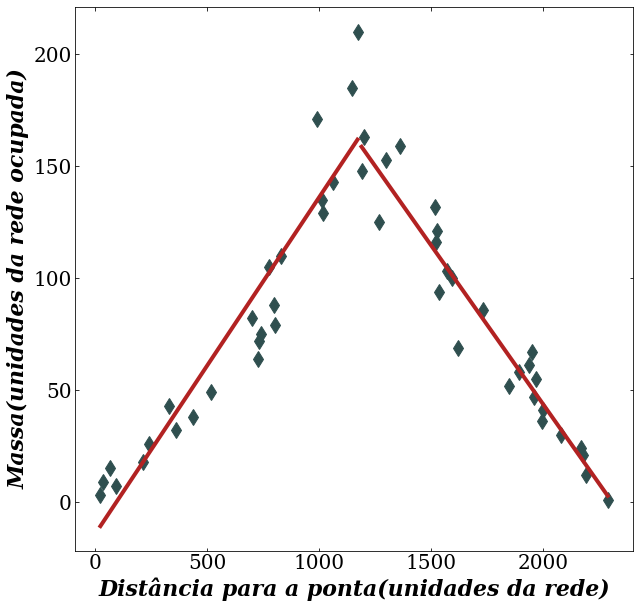

./files/particles/mode_s_ts_1000_nb_10000_seed_49_.dat


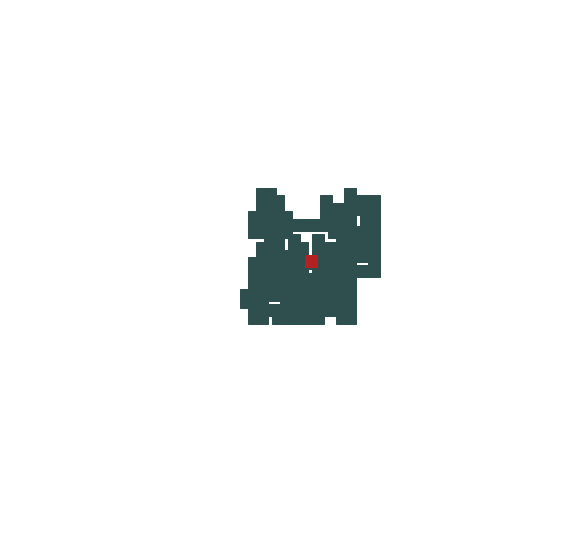

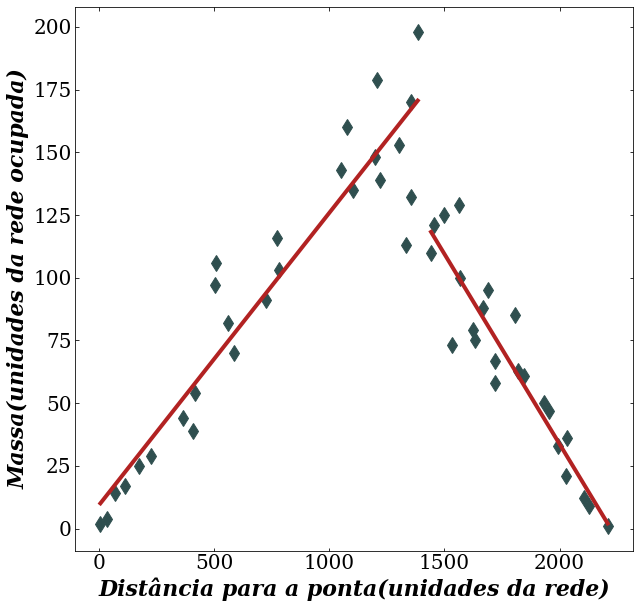

./files/particles/mode_s_ts_1000_nb_10000_seed_47_.dat


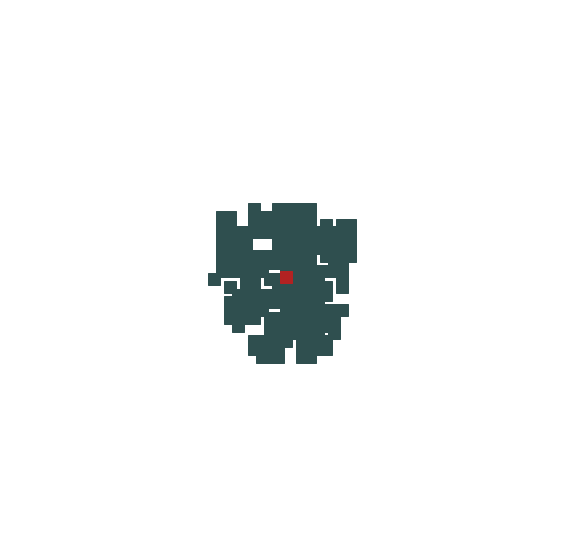

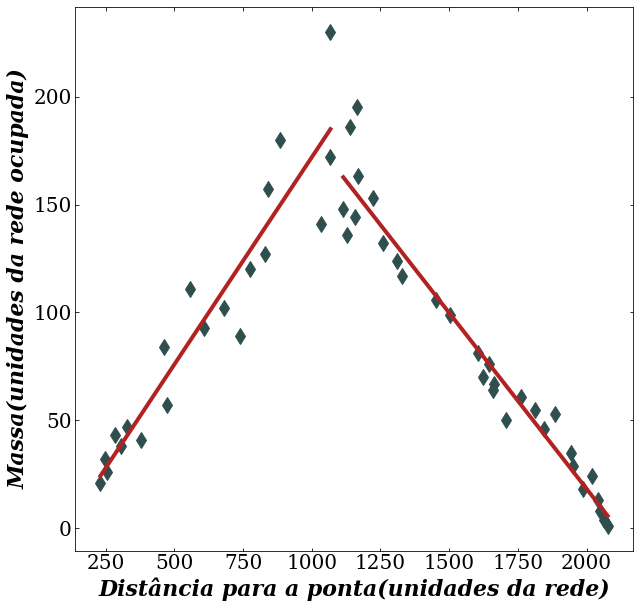

./files/particles/mode_s_ts_1000_nb_10000_seed_45_.dat


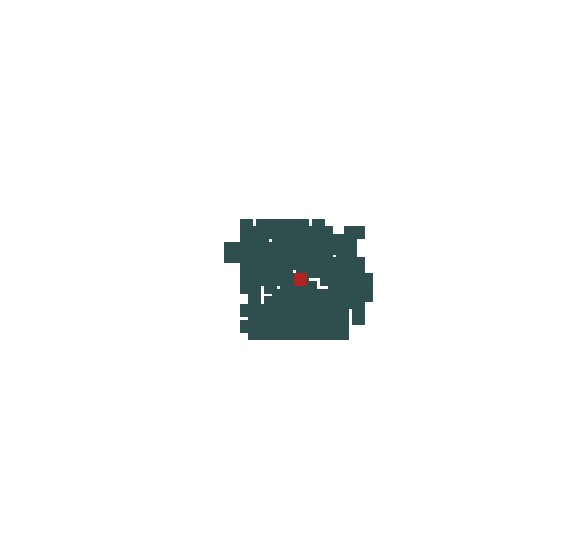

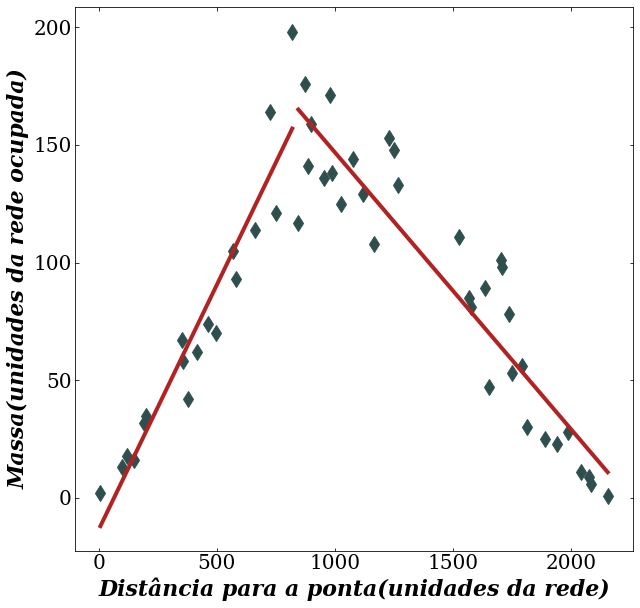

./files/particles/mode_s_ts_10000_nb_10000_seed_66_.dat


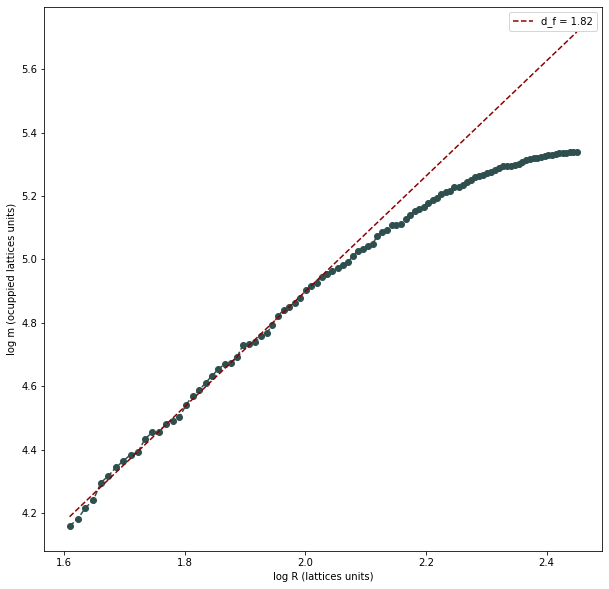

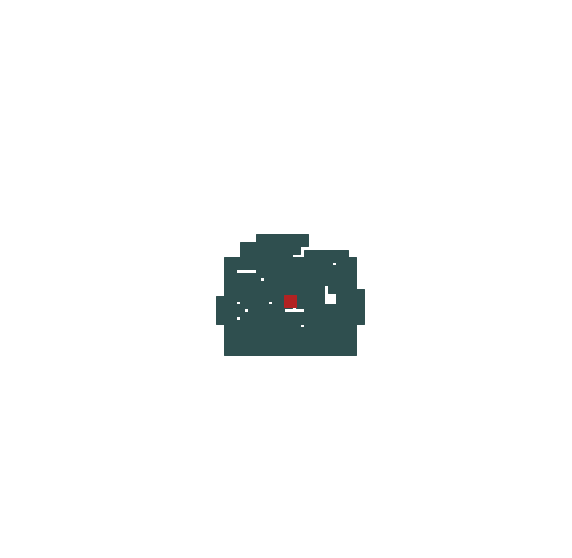

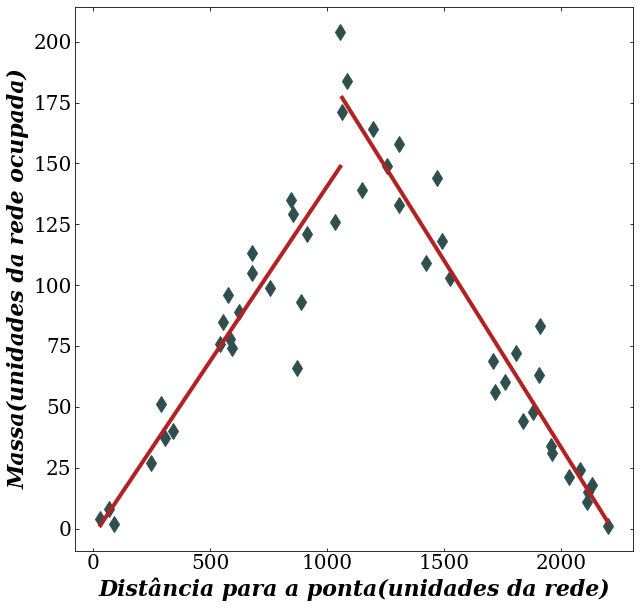

./files/particles/mode_s_ts_10000_nb_10000_seed_68_.dat


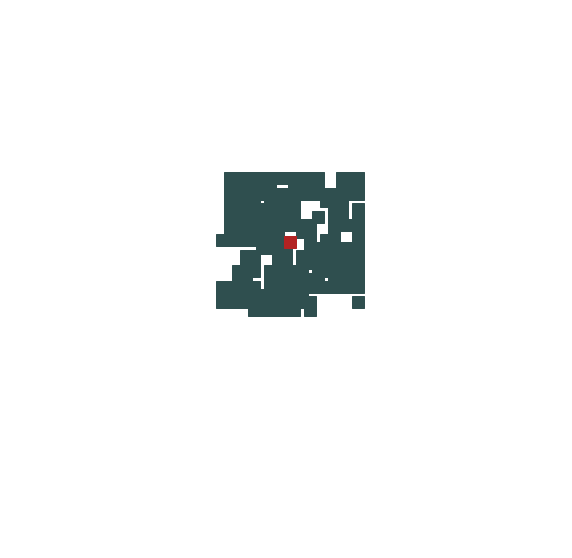

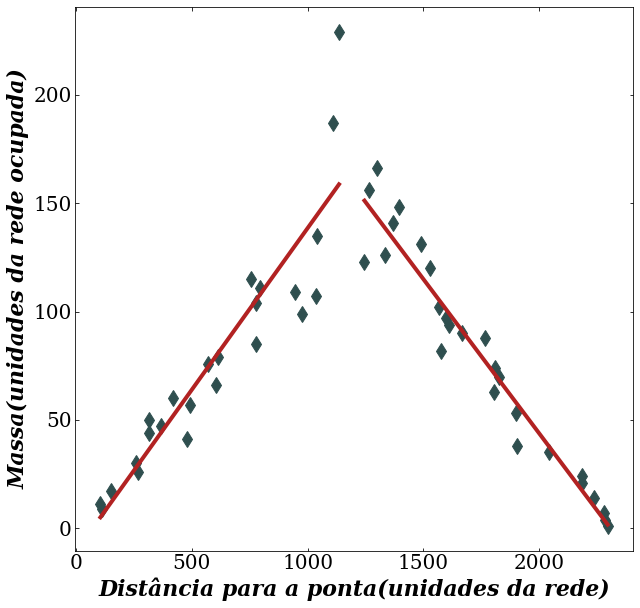

./files/particles/mode_s_ts_10000_nb_10000_seed_70_.dat


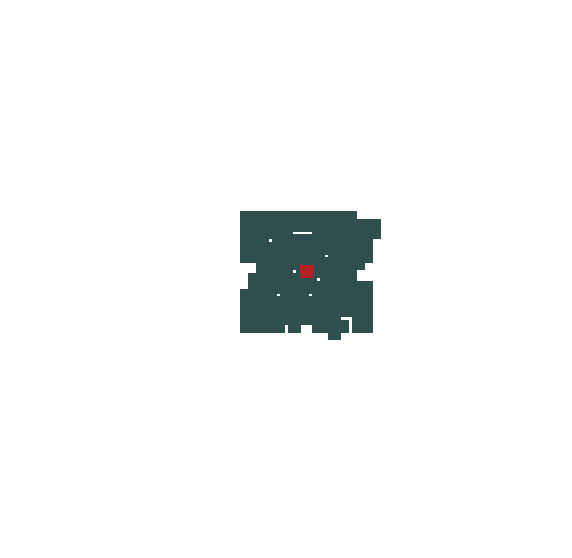

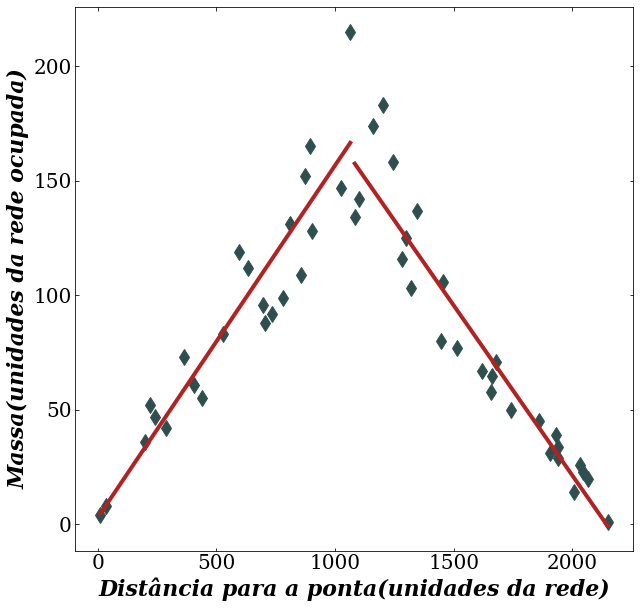

./files/particles/mode_s_ts_10000_nb_10000_seed_67_.dat


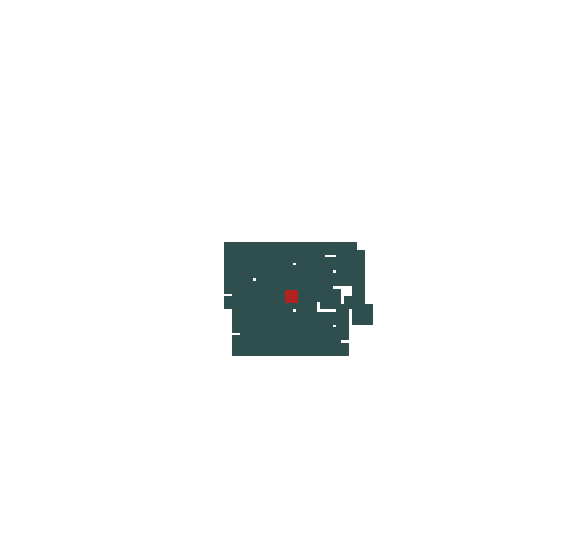

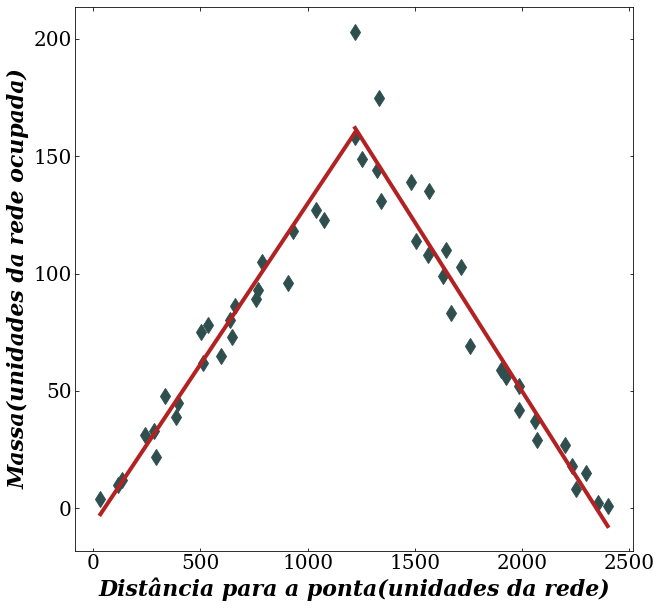

./files/particles/mode_s_ts_10000_nb_10000_seed_69_.dat


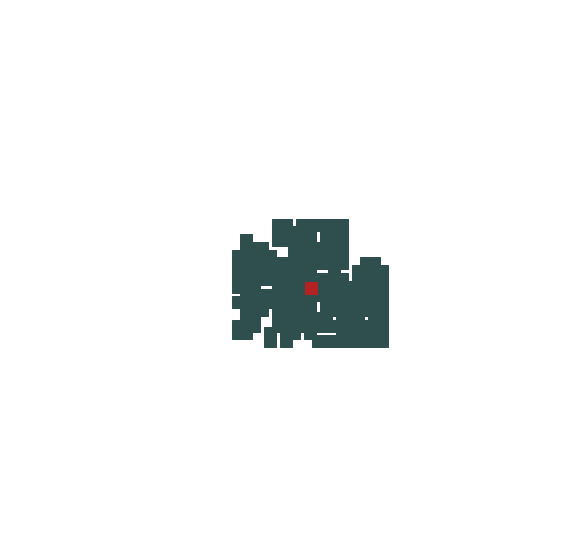

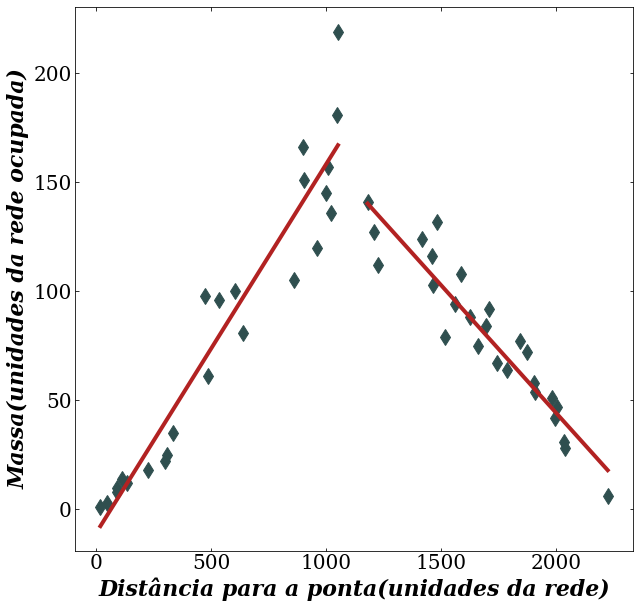

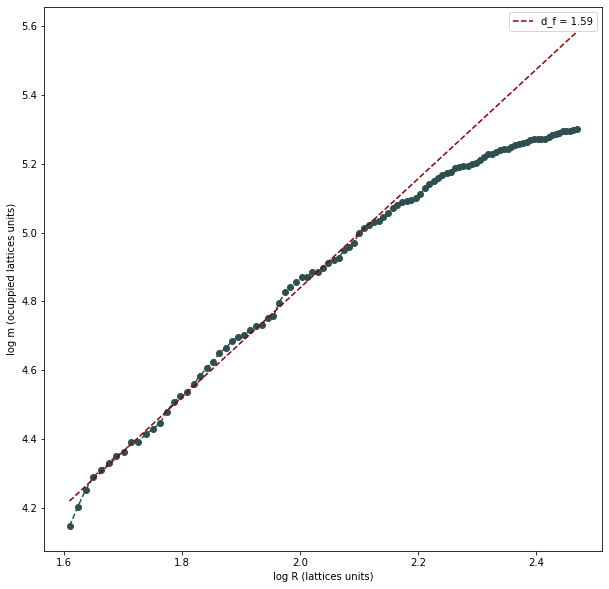

In [10]:
## CODIGO CERTO

for J in files[:]:
    
    L, R, D, F, c, num, cont, r, zs, xs = [], [], [],[], 0, 50, 0, 0, [], []

    for i in os.listdir('./files/particles'):
        i.split()
        #print(i)
        #print(J)
        if i[:-7] == J:
            arquivo_ = ('./files/particles/%s' %i)
            print(arquivo_)
            yt, yt2, counts, max, length = mass_center(arquivo_)
            x, z, xc, zc, radius, densidade = transversal_section (arquivo_, max, yt, arquivo_)
            mass_per_length(yt2,counts,max, num, arquivo_)
            
            for i in range(len(x)):
                xs.append(x[i])
            for i in range(len(z)):
                zs.append(z[i])
                
            x = np.array(xs)
            z = np.array(zs)
            if r < radius:
                r = radius
            if cont == 4:
                df = fractal(r,x,z,xc,zc,cont,arquivo_)
            else:
                cont += 1
            
            if c < 5: 
                #print("No arquivo %s" %arquivo_)
                with open('./files/data/'+J+'.txt', "a") as fid:
                    fid.write("%s\n" % arquivo_)
                    fid.write("\n")
                    fid.write("center of fibril ... %d\n" %max)
                    fid.write("Length ............. %d\n" %length)
                    fid.write("Radius ............. %d\n" %radius)
                    fid.write("Density ....... %.2f\n" %densidade)
                    #fid.write("Fractal dim ... %.2f\n" %df)

                L.append(length)
                R.append(radius)
                D.append(round(densidade, 2))
                c+= 1

            if c == 5:

                mL = sum(L)/len(L)
                mR = sum(R)/len(R)
                mD = sum(D)/len(D)

                with open('./files/data/'+J+'.txt', "a") as fid:
                    fid.write("\n")
                    fid.write("AVERAGE %s\n" % arquivo_)
                    fid.write("\n")
                    fid.write("<Length> ........ %d\n" %mL)
                    fid.write("<Radius> ........ %d\n" %mR)
                    fid.write("<Density> ....... %.2f\n" %mD)
                    fid.write("<Fractal dim> ... %.2f\n" %df)
                    fid.write("\n")
                c = 0

./files/particles/mode_n_ts_1_nb_10000_seed_11_.dat
[1364, 1087, 1079, 1083, 1060, 902, 880, 1007, 1262, 921, 863, 831, 587, 586, 533, 543, 565, 431, 572, 653, 306, 360, 244, 190, 198, 69, 22]
1
[1364, 1087, 1079, 1083, 1060, 902, 880, 1007, 1262, 921, 863, 831, 587, 586, 533, 543, 565, 431, 572, 653, 306, 360, 244, 190, 198, 69, 22]
2
[]
3
[]
4
[]
./files/particles/mode_n_ts_10000_nb_10000_seed_58_.dat
[1529, 1482, 1409, 1511, 1285, 1059, 1269, 1254, 1170, 1101, 972, 1108, 916, 861, 865, 804, 904, 736, 709, 599, 584, 684, 652, 375, 378, 332, 231, 118, 86, 8]
./files/particles/mode_s_ts_1_nb_10000_seed_30_.dat
[1529, 1482, 1409, 1511, 1285, 1059, 1269, 1254, 1170, 1101, 972, 1108, 916, 861, 865, 804, 904, 736, 709, 599, 584, 684, 652, 375, 378, 332, 231, 118, 86, 8, 1072, 1065, 760, 813, 800, 730, 569, 815, 566, 505, 357, 428, 453, 463, 438, 427, 328, 303, 327, 318, 243, 194, 153, 110, 13, 8]
./files/particles/mode_s_ts_10000_nb_10000_seed_69_.dat
[1529, 1482, 1409, 1511, 1285, 1059, 1

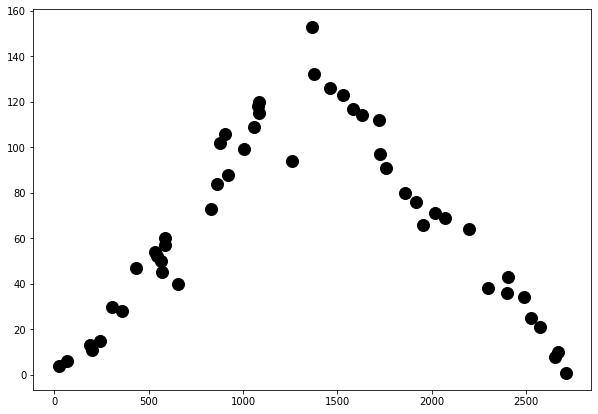

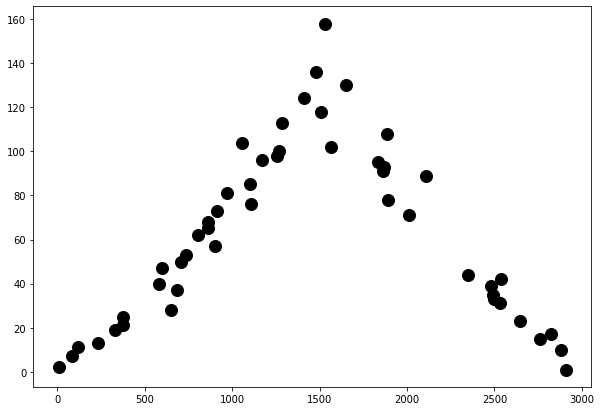

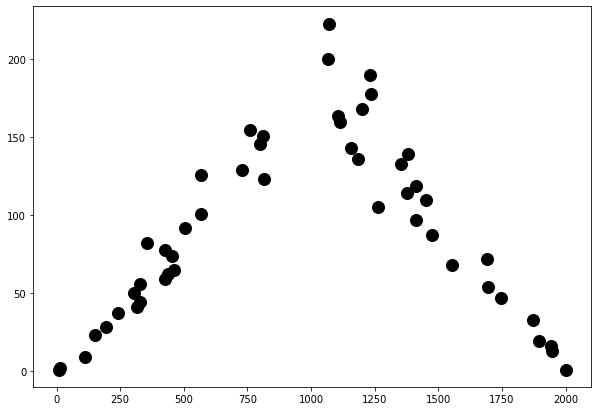

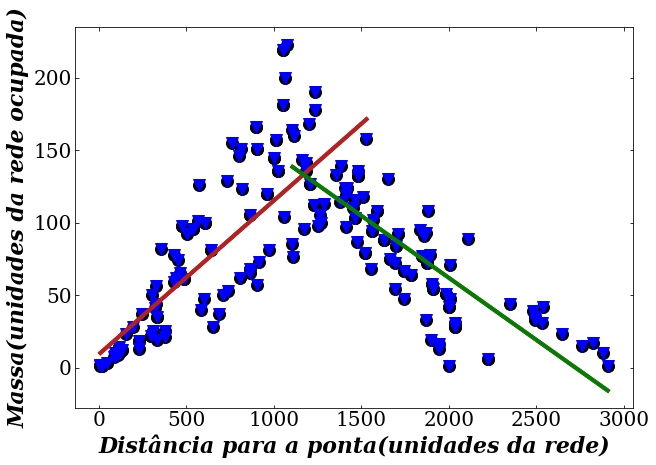

In [74]:
lista = ['mode_n_ts_1_nb_10000_seed_11_.dat','mode_n_ts_10000_nb_10000_seed_58_.dat','mode_s_ts_1_nb_10000_seed_30_.dat', 'mode_s_ts_10000_nb_10000_seed_69_.dat']
v1, v2, v3, v4, C  = [], [], [], [], 0

for J in lista[:]:
    for i in os.listdir('./files/particles'):
        if J == i:
            yleft = []
            yright = []
            xleft = []
            xright = []
            Xr, Yr = [], []
            arquivo_ = ('./files/particles/%s' %J)
            print(arquivo_)
          
            
            yt, yt2, counts, max, length = mass_center(arquivo_)
            plt.figure(figsize = (10,7))
            fontlabel = {'family': 'serif',
                'color':  'black',
                'weight': 'heavy',
                'style': 'italic',
                'size': 22,
                }
            
            #print(yt)

            idx = np.round(np.linspace(0, len(yt2) - 1, num)).astype(int)


            for j in idx:

                #print(type(int(j)))
                plt.plot(yt2[int(j)] - np.min(yt2), counts[int(j)], color = 'black', linewidth = 4,markersize=12, marker = 'o', zorder = 1)
                #print(yt[j] - min(yt))
                Xr.append(yt2[int(j)] - np.min(yt2))
                Yr.append(counts[int(j)])
                #print(counts[j])

                if yt2[j] > max:
                    yright.append(counts[j])
                    xright.append(yt2[j] - np.min(yt2))

                else:
                    yleft.append(counts[j])
                    xleft.append(yt2[j] - np.min(yt2))

            print(xleft)
            #print(xleft)
            if C ==0:
                print("1")
                print(xleft)
                v1.append(xleft)
                v1.append(yleft)
                v1.append(xright)
                v1.append(yright)
                v1.append(Xr)
                v1.append(Yr)

                xleft.clear()
                yleft.clear()
                xright.clear()
                yright.clear()
                Xr.clear()
                Yr.clear()
                C+=1
            if C ==1:
                print("2")
                print(xleft)
                v2.append(xleft)
                v2.append(yleft)
                v2.append(xright)
                v2.append(yright)
                v2.append(Xr)
                v2.append(Yr)
                xleft.clear()
                yleft.clear()
                xright.clear()
                yright.clear()
                Xr.clear()
                Yr.clear()
                C+=1

            if C ==2:
                print("3")
                print(xleft)
                v3.append(xleft)
                v3.append(yleft)
                v3.append(xright)
                v3.append(yright)
                v3.append(Xr)
                v3.append(Yr)
                xleft.clear()
                yleft.clear()
                xright.clear()
                yright.clear()
                Xr.clear()
                Yr.clear()
                C+=1

            if C ==3:
                print("4")
                print(xleft)
                v4.append(xleft)
                v4.append(yleft)
                v4.append(xright)
                v4.append(yright)
                v4.append(Xr)
                v4.append(Yr)
                xleft.clear()
                yleft.clear()
                xright.clear()
                yright.clear()
                Xr.clear()
                Yr.clear()
                C+=1
            

xleft = v1[0]
xright = v1[2]
yleft = v1[1]
yright = v1[3]
#print(len(xleft))
#print(len(yleft))
## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
Y = Y[0]
plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y,color = 'firebrick', linewidth = 4, zorder = 5)

reg = LinearRegression().fit(xright, yright)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
Yy = Yy[0]
plt.plot(v1[4], v1[5], color = 'black', linestyle='',linewidth = 4,markersize=12, marker = 'o', zorder = 1)
plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy,color = 'firebrick', linewidth = 4,zorder = 5)
plt.xlabel('Distância para a ponta(unidades da rede)',fontdict=fontlabel)
plt.ylabel("Massa(unidades da rede ocupada)",fontdict=fontlabel)
plt.xticks(size = 20, family = 'serif', weight = 'normal')
plt.yticks(size = 20, family = 'serif', weight = 'normal')
plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )
#plt.savefig("./img/"+arquivo[18:-4]+"_tips" + '.jpg', dpi=400)


xleft = v2[0]
xright = v2[2]
yleft = v2[1]
yright = v2[3]
#print(len(xleft))
#print(len(yleft))
## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
Y = Y[0]
plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y,color = 'firebrick', linewidth = 4, zorder = 5)

reg = LinearRegression().fit(xright, yright)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
Yy = Yy[0]
plt.plot(v2[4], v2[5], color = 'blue', linestyle='',linewidth = 4,markersize=12, marker = 'v', zorder = 1)
plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy,color = 'green', linewidth = 4,zorder = 5)
plt.xlabel('Distância para a ponta(unidades da rede)',fontdict=fontlabel)
plt.ylabel("Massa(unidades da rede ocupada)",fontdict=fontlabel)
plt.xticks(size = 20, family = 'serif', weight = 'normal')
plt.yticks(size = 20, family = 'serif', weight = 'normal')
plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )
#plt.savefig("./img/"+arquivo[18:-4]+"_tips" + '.jpg', dpi=400)
plt.show()

-43
-96
21
110
-42
814


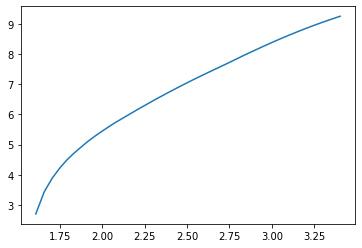

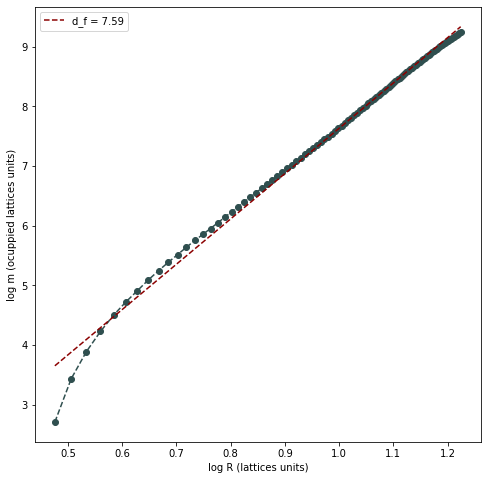

In [34]:

J = 'mode_n_ts_1_nb_10000_seed_'
L, D, F, c, num, cont, r, zs, xs = [], [],[], 0, 50, 0, 0, [], []
for i in os.listdir('./files/particles'):
    #print(i)
    i.split
    
    if i[:-7] == J:
        arquivo_ = ('./files/particles/%s' %i)
        #print(cont)

        y, yt2, counts1 = [], [], []

        with open(arquivo_, 'r') as fid:
            for row in fid:
                row = row.split()
                y.append(int(row[3]))
        yc, counts = np.unique(y, return_counts=True)    
        #print(yc)
        #print(counts)
        fiber_length = np.max(yc) - np.min(yc)
        # y of mass center
        yc0 = sorted(zip(yc, counts), key=lambda u: u[1], reverse=True)
        print(yc0[0][0])
        with open(arquivo_, 'r') as fid:
            for row in fid:
                row = row.split()

                if int(row[3]) == yc0[0][0]:
                    xs.append(int(row[2]))
                    zs.append(int(row[4]))

zc = np.mean(zs)
xc = np.mean(xs)
print(len(xs))


r = 0
for i in range(0,len(xs)):
    R = np.sqrt((xs[i]-xc)**2 + (zs[i]-zc)**2)
    if R > r:
        r = R

Rlist = np.linspace(5,r, 100)
mass = []
c = 0
for i in Rlist:
    for j in range(0,len(xs)):
        ray = R = np.sqrt((xs[j]-xc)**2 + (zs[j]-zc)**2)
        if ray <= i:
            c += 1
    mass.append(c)

list_mass = np.array(mass)

list_mass = np.log(list_mass/5)
Rlist = np.log(Rlist)


plt.plot(Rlist,list_mass)
plt.show()

vmin = np.log(Rlist[0])
vmax = np.log(Rlist[-1])
Rlist = np.log(Rlist).reshape(-1,1)
cont = list_mass.reshape(-1,1)
j, R = 0, 0
#print(Rlist)
#print(cont)
for i in range(10,len(Rlist)):
    reg = LinearRegression().fit(Rlist[:i], cont[:i])
    r2 = reg.score(Rlist[:i], cont[:i])
    if(r2 > R):     
        R = r2
        j = i
    #Y = reg.coef_*v[:i] + reg.intercept_
reg = LinearRegression().fit(Rlist[:j], cont[:j])
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
plt.figure(figsize = (8,8))
plt.plot(Rlist, cont, 'o--',color='darkslategray')
plt.xlabel('log R (lattices units)')
plt.ylabel('log m (ocuppied lattices units)')
plt.plot(np.array([vmin,vmax]), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
plt.legend()



In [5]:
L, R, D, F, c, num, cont, r, zs, xs = [], [], [],[], 0, 50, 0, 0, [], []
#J = files[4]
j = 'dla_mode_n_ts_10000_nb_10000_seed_62_teste.dat'
for i in os.listdir('./files/'):
        #i.split()
        #print(i[3:-7])
        if i == j:
            print(i)
            extend_fibers(i)

J = 'mode_n_ts_10000_nb_10000_seed_62_teste.dat'
for i in os.listdir('./files/particles'):
    print(i)
    #i.split()
    #print(i)
    #print(J)
    if i == J:
        arquivo_ = ('./files/particles/%s' %i)
        print(arquivo_)
        yt, yt2, counts, max, length = mass_center(arquivo_)
        x, z, xc, zc, radius, densidade = transversal_section (arquivo_, max, yt, arquivo_)
        mass_per_length(yt2,counts,max, num, arquivo_)
        
        for i in range(len(x)):
            xs.append(x[i])
        for i in range(len(z)):
            zs.append(z[i])
            
        x = np.array(xs)
        z = np.array(zs)
        if r < radius:
            r = radius
        if cont == 4:
            df = fractal(r,x,z,xc,zc,cont,arquivo_)
        else:
            cont += 1
        
        if c < 5: 
            #print("No arquivo %s" %arquivo_)
            with open('./files/data/'+J+'.txt', "w") as fid:
                fid.write("%s\n" % arquivo_)
                fid.write("\n")
                fid.write("Length ........ %d\n" %length)
                fid.write("Radius ........ %d\n" %radius)
                fid.write("Density ....... %.2f\n" %densidade)
                #fid.write("Fractal dim ... %.2f\n" %df)

            L.append(length)
            R.append(radius)
            D.append(round(densidade, 2))
            c+= 1

        if c == 5:

            mL = sum(L)/len(L)
            mR = sum(R)/len(R)
            mD = sum(D)/len(D)

            with open('./files/data/'+J+'.txt', "a") as fid:
                fid.write("\n")
                fid.write("AVERAGE %s\n" % arquivo_)
                fid.write("\n")
                fid.write("<Length> ........ %d\n" %mL)
                fid.write("<Radius> ........ %d\n" %mR)
                fid.write("<Density> ....... %.2f\n" %mD)
                fid.write("<Fractal dim> ... %.2f\n" %df)
                fid.write("\n")

            c = 0

mode_s_ts_1000_nb_10000_seed_48_.dat
mode_n_ts_100_nb_10000_seed_22_.dat
mode_n_ts_1_nb_10000_seed_14_.dat
mode_n_ts_1_nb_10000_seed_11_.dat
mode_n_ts_1000_nb_10000_seed_27_.dat
mode_s_ts_1_nb_10000_seed_32_.dat
mode_n_ts_100_nb_10000_seed_24_.dat
mode_n_ts_1_nb_10000_seed_10_.dat
mode_n_ts_10_nb_10000_seed_19_.dat
mode_n_ts_10_nb_10000_seed_17_.dat
mode_s_ts_10000_nb_10000_seed_66_.dat
mode_n_ts_100_nb_10000_seed_21_.dat
mode_s_ts_10000_nb_10000_seed_68_.dat
mode_n_ts_10000_nb_10000_seed_53_.dat
mode_s_ts_100_nb_10000_seed_41_.dat
mode_n_ts_1000_nb_10000_seed_25_.dat
mode_s_ts_10000_nb_10000_seed_70_.dat
mode_s_ts_10_nb_10000_seed_38_.dat
mode_s_ts_1000_nb_10000_seed_46_.dat
mode_n_ts_10000_nb_10000_seed_56_.dat
mode_n_ts_10000_nb_10000_seed_52_.dat
mode_s_ts_100_nb_10000_seed_43_.dat
mode_n_ts_1000_nb_10000_seed_26_.dat
mode_n_ts_10_nb_10000_seed_16_.dat
mode_s_ts_10_nb_10000_seed_37_.dat
mode_s_ts_1_nb_10000_seed_34_.dat
mode_s_ts_1_nb_10000_seed_33_.dat
mode_s_ts_1000_nb_10000_seed

In [ ]:
arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(1,j))
print(arquivo_)
yt, counts, max, length = mass_center(arquivo_)
#print(max[0])

x, z, xc, zc, radius = transversal_section (arquivo_, max)

In [28]:
num = 500
c = 0
L, R , D, F, I = [], [], [], [], 1
J = files[4]
print()
for i in range(0,4):
    for j in range(0,5):

        arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(I,j))
        yt, counts, max, length = mass_center(arquivo_)
        x, z, xc, zc, radius = transversal_section (arquivo_, max)
        df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
        mass_per_length(yt,counts,max, num)
    
        if c < 5: 
            print("No arquivo %s" %arquivo_)
            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("%s\n" % arquivo_)
                fid.write("\n")
                fid.write("Length ........ %d\n" %length)
                fid.write("Radius ........ %d\n" %radius)
                fid.write("Density ....... %.2f\n" %densidade)
                fid.write("Fractal dim ... %.2f\n" %df)

            L.append(length)
            R.append(radius)
            D.append(round(densidade, 2))
            F.append(round(df, 2))
            c+= 1

        if c == 5:

            mL = sum(L)/len(L)
            mR = sum(R)/len(R)
            mD = sum(D)/len(D)
            mF = sum(F)/len(F)

            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("\n")
                fid.write("AVERAGE %s\n" % arquivo_)
                fid.write("\n")
                fid.write("<Length> ........ %d\n" %mL)
                fid.write("<Radius> ........ %d\n" %mR)
                fid.write("<Density> ....... %.2f\n" %mD)
                fid.write("<Fractal dim> ... %.2f\n" %mF)
                fid.write("\n")

            c = 0

    I = I *10


FileNotFoundError: [Errno 2] No such file or directory: './files/particles/n_mode_1_0.dat'

Para 1 arquivo


In [62]:

def extend_fibers(fname):    
    print('extending ', fname)
    #fout = fname.replace('dla_','')
    fout = fname.replace('/n','/particles')
    with open (fout, "w") as fid:
        with open(fname, 'r') as fid2:
            for row in fid2:
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])
                    for i in range(0,18):
                        fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))

wdir = './files/particles'

#for fname in os.listdir(wdir):
fname = './files/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat'
extend_fibers(fname)

extending  ./files/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat


4
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entr

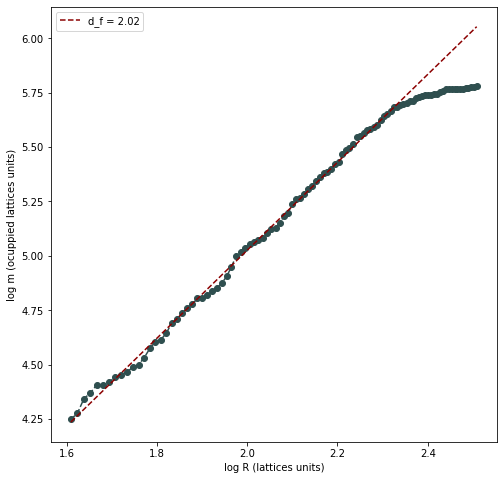

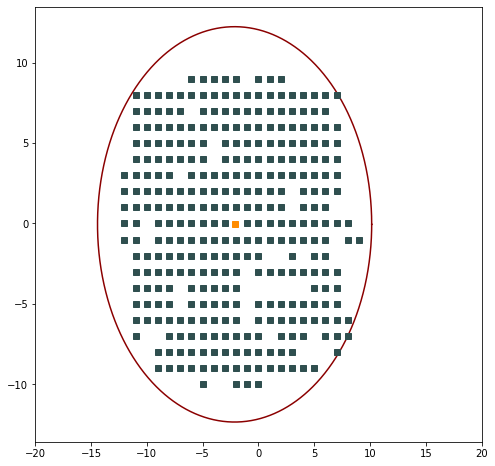

In [85]:
arquivo_ = ('./files/particles/dla_mode_n_ts_1000_nb_10000_seed_90_.dat')
yt, counts, max, length = mass_center(arquivo_)
print(max)
x, z, xc, zc, radius = transversal_section (arquivo_, max, yt)
df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
#mass_per_length(yt,counts,max, num)

In [53]:
##Compare two files


import filecmp
  
f1 = "./files/dla/dla_10"
f2 = "./files/dla_t"

result = filecmp.cmp(f1, f2, shallow = True)
print(result)

True
